In [1]:
# Importing all python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('Hotel Bookings.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
df.shape # To check the rows and columns in our dataset

(119390, 32)

In [4]:
# To check null values in our dataset
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
# replacing null values from our data for better decision making

df.drop('company',axis=1,inplace=True)
null_replacement = {'agent':0,'country':'unknown','children':0}

df = df.fillna(null_replacement)

In [6]:
df.isnull().sum() # rechecking our dataset if any null values present

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [7]:
# This will create summary of html report for our whole dataset. 

# report = ProfileReport(df)
# report.to_file('Report.html')

# EDA

# Using plotly.graph_objs to create donut pie chart for easy download for ppt purpose

# Creating pie plot with plotly.express for clean visualization and easy to download  for ppt purpose

In [8]:
# Total length of dataset and total number of guest in city vs resort hotel 
pie1 = go.Pie(
    domain={'x': [0.15, 0.85], 'y': [0.15, 0.85]},
    values= [len(df)],
    labels=['Total Dataset'],
    textinfo='value+label',
    textposition='inside',
    marker={'line': {'color': 'white', 'width': 1}}
)



pie2 = go.Pie(
    hole=0.7,
    direction='clockwise',
    values=df['hotel'].value_counts(),
    labels=df['hotel'].value_counts().index,
    textinfo='value+percent+label',
    textposition='outside',
    marker={'colors': ['red', 'blue'],
            'line': {'color': 'white', 'width': 1}}
)


fig = go.FigureWidget(data=[pie1, pie2])
fig

FigureWidget({
    'data': [{'domain': {'x': [0.15, 0.85], 'y': [0.15, 0.85]},
              'labels': [Total …

In [9]:
print(f"Total number of Resort hotel is {len(df[df['hotel'] == 'Resort Hotel'])} out of {len(df)} i.e {round(len(df[df['hotel'] == 'Resort Hotel']) *100/ len(df),2)}%")
print(f"Total number of City hotel is {len(df[df['hotel'] == 'City Hotel'])} out of {len(df)} i.e {round(len(df[df['hotel'] == 'City Hotel']) *100/ len(df),2)}%")

Total number of Resort hotel is 40060 out of 119390 i.e 33.55%
Total number of City hotel is 79330 out of 119390 i.e 66.45%


In [10]:
# Creating dataset for total guest without cancellation.


total_guest = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]
total_guest = total_guest[total_guest['is_canceled'] == 0]

# for getting particular view
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

total_guest['arrival_date_month'] = pd.Categorical(total_guest['arrival_date_month'],categories=ordered_months,ordered=True)

In [11]:
# Pie chart total length of dataset and total number of guest in city vs resort hotel after removing cancellation of hotel.
pie1 = go.Pie(
    domain={'x': [0.15, 0.85], 'y': [0.15, 0.85]},
    values= [len(total_guest)],
    labels=['Total Dataset'],
    textinfo='value+label',
    textposition='inside',
    marker={'line': {'color': 'white', 'width': 1}}
)



pie2 = go.Pie(
    hole=0.7,
    direction='clockwise',
    values=total_guest['hotel'].value_counts(),
    labels=total_guest['hotel'].value_counts().index,
    textinfo='value+percent+label',
    textposition='outside',
    marker={'colors': ['red', 'blue'],
            'line': {'color': 'white', 'width': 1}}
)


fig = go.FigureWidget(data=[pie1, pie2])
fig

FigureWidget({
    'data': [{'domain': {'x': [0.15, 0.85], 'y': [0.15, 0.85]},
              'labels': [Total …

In [12]:
print(f"Total number of Resort hotel after removing cancellation is {len(total_guest[total_guest['hotel'] == 'Resort Hotel'])} out of {len(total_guest)} i.e {round(len(total_guest[total_guest['hotel'] == 'Resort Hotel']) *100/ len(total_guest),2)}%")
print(f"Total number of City hotel after removing cancellation is {len(total_guest[total_guest['hotel'] == 'City Hotel'])} out of {len(total_guest)} i.e {round(len(total_guest[total_guest['hotel'] == 'City Hotel']) *100/ len(total_guest),2)}%")

Total number of Resort hotel after removing cancellation is 28927 out of 75011 i.e 38.56%
Total number of City hotel after removing cancellation is 46084 out of 75011 i.e 61.44%


In [13]:
# Creating dataframe of total guest appear from different countries

country_df = pd.DataFrame(total_guest['country'].value_counts())

country_df['guest %'] = round(country_df['country']*100/len(total_guest),2)
country_df.columns = ['number of guest','guest %']
country_df.head()

number of guest  guest %
PRT            20977    27.97
GBR             9668    12.89
FRA             8468    11.29
ESP             6383     8.51
DEU             6067     8.09

In [14]:
# fig, ax = plt.subplots(figsize=(16, 10), subplot_kw=dict(aspect="equal"))

# def func(pct, allvals):
#     absolute = int(pct/100.*np.sum(allvals))
#     return "{:.1f}%\n({:d} g)".format(pct, absolute)


# wedges, texts, autotexts = ax.pie(country_df['number of guest'], autopct=lambda pct: func(pct, country_df['number of guest']),
#                                   textprops=dict(color="w"))


# ax.legend(wedges, country_df.index,
#           title="country",
#           loc="best",
#           bbox_to_anchor=(1, 0, 0.5, 1))

# plt.setp(autotexts, size=8, weight="bold")
# ax.set_title('Country Wise guest',fontsize=14)
# plt.show()

In [15]:
fig = px.pie(country_df,names=country_df.index,
             values='number of guest',
             template='seaborn',
             title='Country Wise guest')
fig.update_traces(textposition="inside",textinfo="value+percent+label")

In [16]:
print('As you can see most number of guest appear from PRT(Portugal).')
country_df[:1]

As you can see most number of guest appear from PRT(Portugal).


number of guest  guest %
PRT            20977    27.97

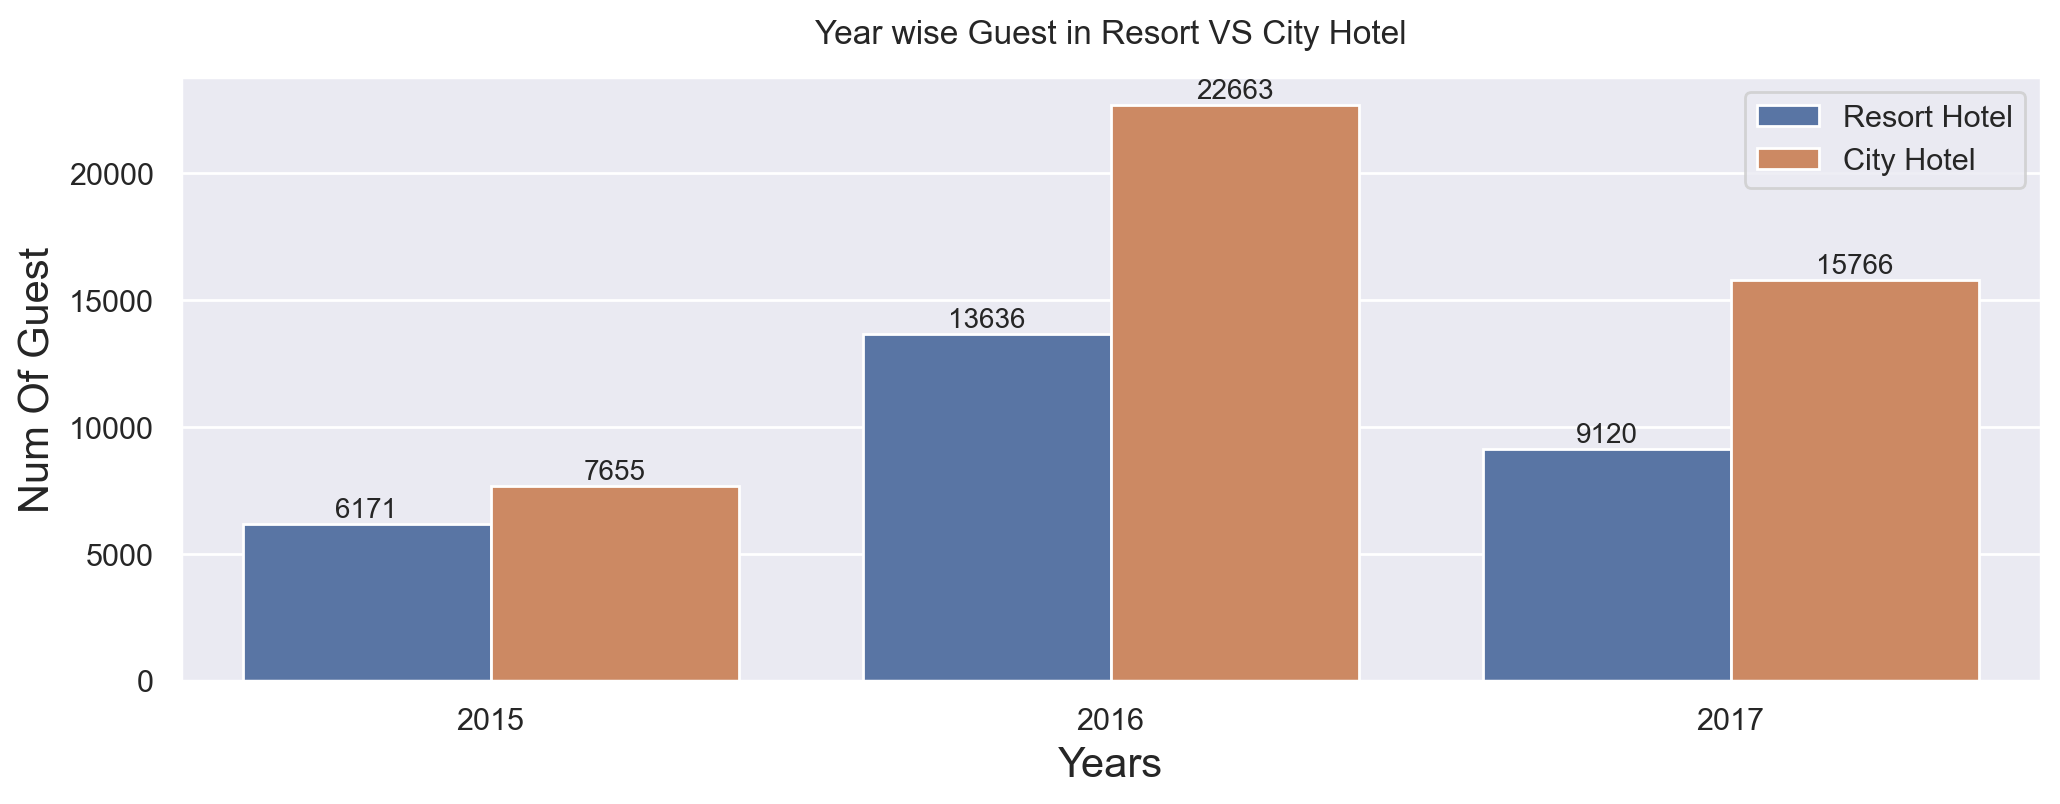

In [17]:
# Barplot year wise guest appearance

plt.figure(figsize=(12,4),dpi=200)
sns.set(style='darkgrid') #white, dark, whitegrid, darkgrid, ticks
plot = sns.countplot(data=total_guest,x='arrival_date_year',hue='hotel')
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0,5),
                   textcoords='offset points')

plt.xlabel('Years',fontsize=15)
plt.ylabel('Num Of Guest',fontsize=15)
plt.legend(loc='best')
plt.title('Year wise Guest in Resort VS City Hotel',pad=12)
plt.show()

In [18]:
# Now we have to check Avearge guest appearance for every month
# So we have to divide arrival_date_month with 3 because we have 3 years i.e (2015,2016,2017).

print("\t2015\n")
print(total_guest[total_guest['arrival_date_year'] == 2015]['arrival_date_month'].value_counts())
print("\n\t2016\n")
print(total_guest[total_guest['arrival_date_year'] == 2016]['arrival_date_month'].value_counts())
print("\n\t2017")
total_guest[total_guest['arrival_date_year'] == 2017]['arrival_date_month'].value_counts()

	2015

October      3219
September    3016
August       2285
December     1940
November     1851
July         1515
January         0
February        0
March           0
April           0
May             0
June            0
Name: arrival_date_month, dtype: int64

	2016

October      3682
May          3560
September    3369
April        3365
March        3342
August       3230
June         3194
July         3066
November     2800
February     2549
December     2451
January      1691
Name: arrival_date_month, dtype: int64

	2017


May          3543
July         3326
March        3278
June         3201
April        3195
August       3109
February     2810
January      2424
September       0
October         0
November        0
December        0
Name: arrival_date_month, dtype: int64

In [19]:
resort_hotel_df = total_guest[total_guest['hotel'] == 'Resort Hotel'] # Resort Hotel without cancellation.
city_hotel_df = total_guest[total_guest['hotel'] == 'City Hotel'] # City Hotel without cancellation.

In [20]:
rh_guest = resort_hotel_df.groupby('arrival_date_month').count()[['hotel']] # Creating Dataframe for resort hotel guest appearance 
rh_guest.columns = ['Number of guest'] # Changing column name
rh_guest['hotel'] = ['resort hotel']*len(rh_guest) # creating new column in our dataframe (For better visualization).

ch_guest = city_hotel_df.groupby('arrival_date_month').count()[['hotel']] # Creating Dataframe for city hotel guest appearnce.
ch_guest.columns = ['Number of guest'] # Changing column name
ch_guest['hotel'] = ['city hotel']*len(ch_guest) # Creating new column in our dataframe (For better visualization).

monthly_guest = pd.concat([rh_guest,ch_guest]) # concatenation for monthly appearance guest from city and resort hotels.
monthly_guest.reset_index(inplace=True)

monthly_guest.head()

arrival_date_month  Number of guest         hotel
0            January             1866  resort hotel
1           February             2308  resort hotel
2              March             2571  resort hotel
3              April             2550  resort hotel
4                May             2535  resort hotel

In [21]:
# FOR AVERAGE GUEST PER MONTH AS THE ABOVE EXPLANATION
monthly_guest['Number of guest'] /= 3

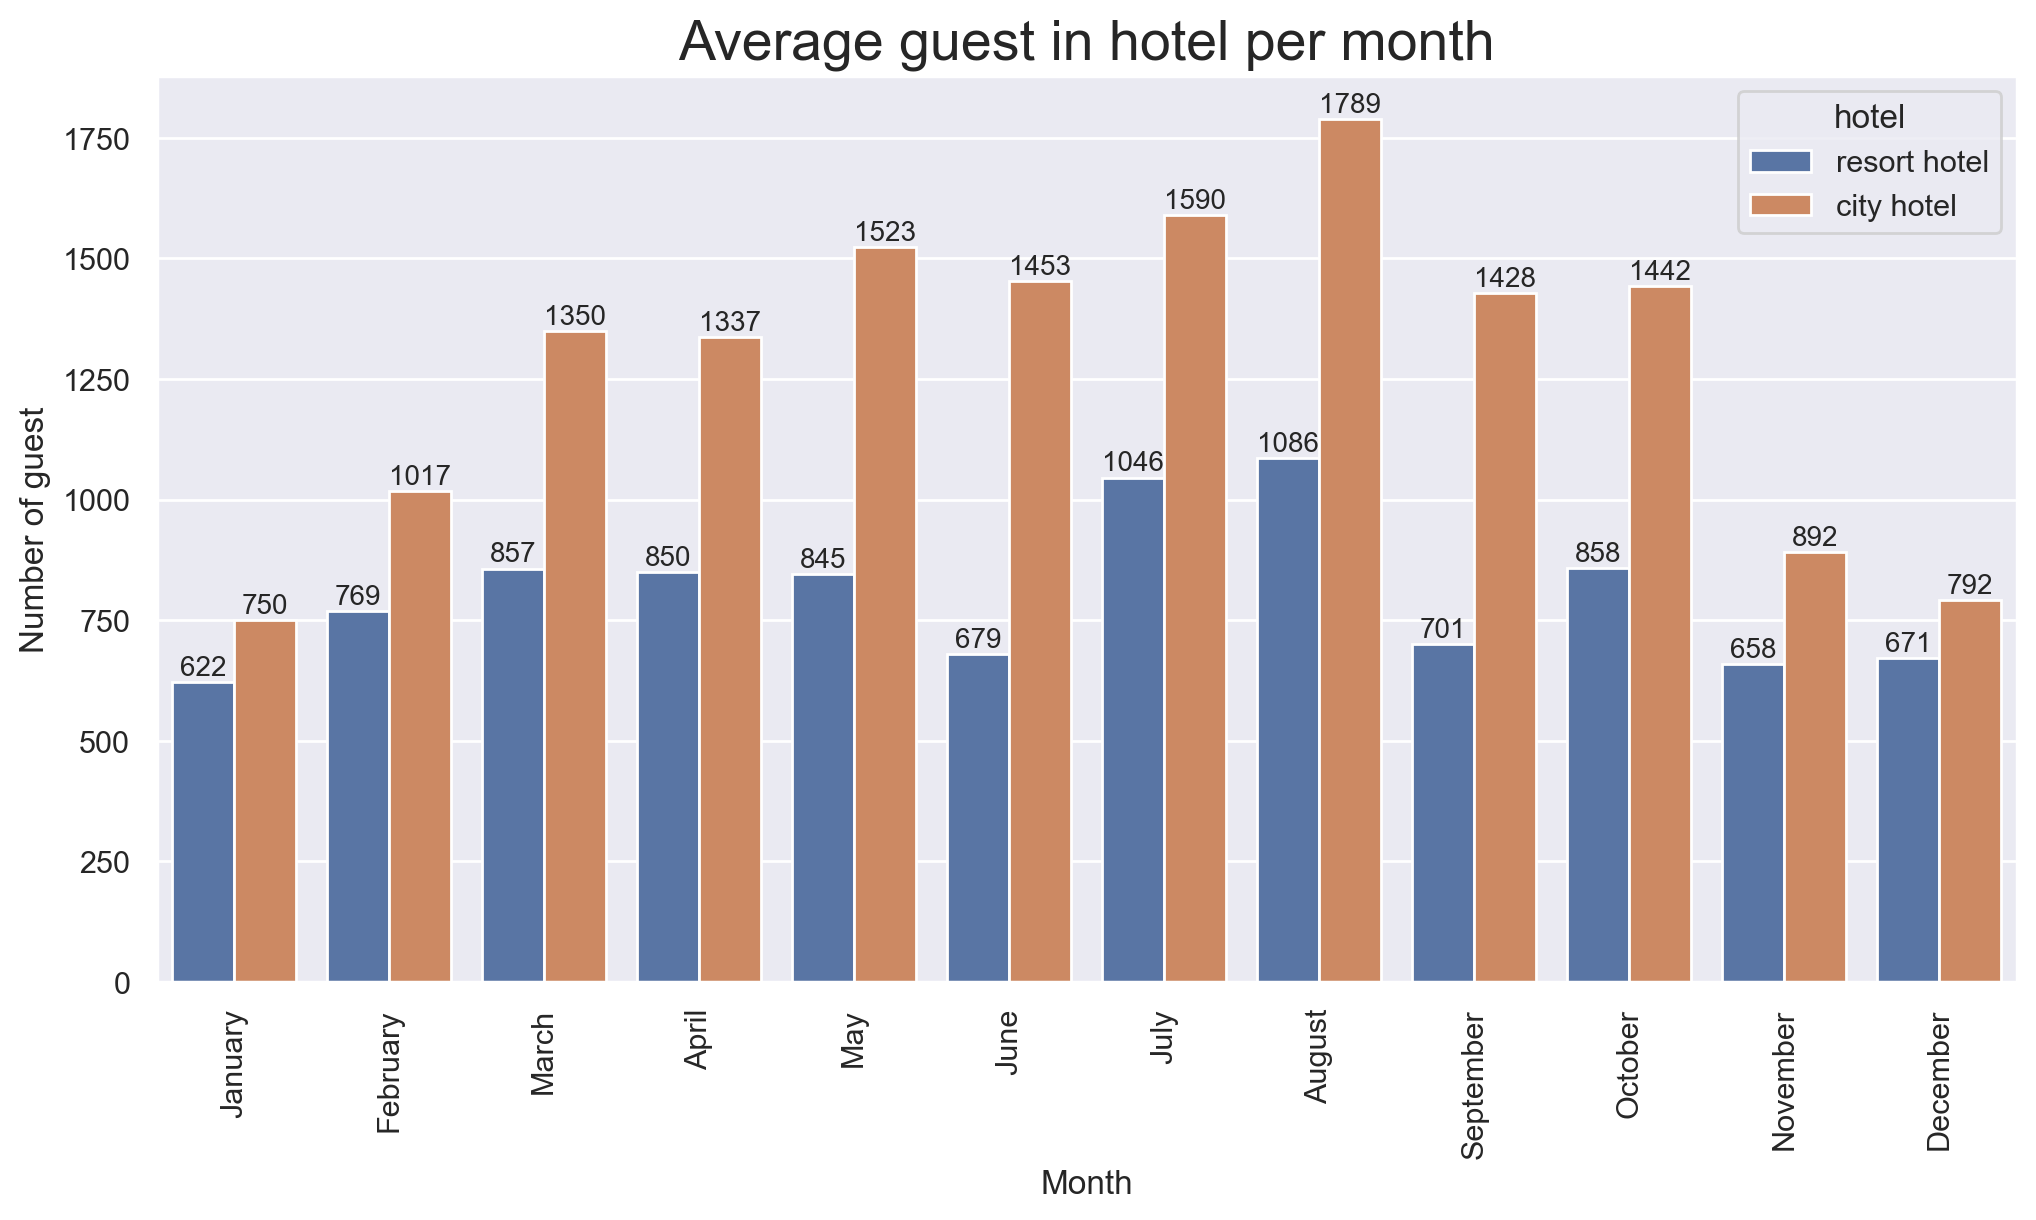

In [22]:
plt.figure(figsize=(12,6),dpi=200)
sns.set(style='darkgrid') #white, dark, whitegrid, darkgrid, ticks
plots = sns.barplot(data=monthly_guest,x='arrival_date_month',y='Number of guest',hue='hotel')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0,5),
                   textcoords='offset points')
plt.xticks(rotation=90)
plt.xlabel('Month')

plt.title('Average guest in hotel per month',fontsize=20,loc='center')
plt.show()

In [23]:
# To check which day of a week having high number of guest.
# For date we need a datetime column of guest appearance.
# We can do this in two way first we can simply use reservataion_status_date and in second method we can create function the use
# arrival_date_year, arrival_date_month, arrival_date_day_of_month to make a date column with the help of function.
# Using second is little tricky then using first one.

# This function help us to convert multiple int into single string form
def date_convert(day,month,year):
    return f"{day}-{month}-{year}"

In [24]:
# Creating new column with np.vectorize easy to use and run fast then apply method when multiple input provided

total_guest['Date'] = np.vectorize(date_convert)(total_guest['arrival_date_day_of_month'],
                     total_guest['arrival_date_month'],
                     total_guest['arrival_date_year'])

# Now we need to convert our new string column into datetime so that we can use it to get our days.
total_guest['Date'] = pd.to_datetime(total_guest['Date'])

# Creating new column having day name as value for every guest appearance.
total_guest['Day Name'] = total_guest['Date'].dt.day_name()


# Use first method instead of second one because it will be more easier and less time taken.

In [25]:
total_guest

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  agent  days_in_waiting_list  \
0                          0       2  ...    0.0                     0   
1                          0       2  ...    0.0                     0   
2                          1       1  ...    0.0                     0   
3                          1       1  ...  304.0                     0   
4                          2       2  ...  240.0                     0   
...                      ...     ...  ...    ...                   ...   
119385                     5       2  ...  394.0                     0   
119386                     5       3  ...    9.0                     0   
119387                     5       2  ...    9.0                     0   
119388                     5       2  ...   89.0                     0   
119389                     7       2  ...    9.0                     0   

       customer_type     adr required_car_parking_spaces  \
0          Transient    0.00                           0   
1          Transient    0.00                           0   
2          Transient   75.00                           0   
3          Transient   75.00                           0   
4          Transient   98.00                           0   
...              ...     ...                         ...   
119385     Transient   96.14                           0   
119386     Transient  225.43                           0   
119387     Transient  157.71                           0   
119388     Transient  104.40                           0   
119389     Transient  151.20                           0   

       total_of_special_requests  reservation_status  reservation_status_date  \
0                              0           Check-Out               2015-07-01   
1                              0

In [26]:
resort_hotel_df = total_guest[total_guest['hotel'] == 'Resort Hotel'] # Resort Hotel data
city_hotel_df = total_guest[total_guest['hotel'] == 'City Hotel'] # City Hotel data



most_booking_dayrh = resort_hotel_df['Day Name'].value_counts().sort_values().to_frame()# creating dataframe with dayname resort hotel 
most_booking_daych = city_hotel_df['Day Name'].value_counts().sort_values().to_frame()# creating dataframe with dayname city hotel

most_booking_dayrh['hotel'] = ['resort hotel']*len(most_booking_dayrh) # new column with hotel name
most_booking_daych['hotel'] = ['city hotel']*len(most_booking_daych) # new column with hotel name

# renaming column name we can use rename function or the given method
most_booking_dayrh.columns = ['Booking','hotel'] 
most_booking_daych.columns = ['Booking','hotel']


# Getting average booking for 3 years i.e 2015,2016 and 2017
most_booking_dayrh['Booking'] /= 3
most_booking_daych['Booking'] /= 3

# Creating new dataframe with concatenation 
most_booking_days = pd.concat([most_booking_dayrh,most_booking_daych])

# Renaming and reseting index
most_booking_days.reset_index(inplace=True)
most_booking_days.columns = ['Day Name','Booking','Hotel']

# To present in particular order
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] 
most_booking_days['Day Name'] = pd.Categorical(most_booking_days['Day Name'],categories=order_days,ordered=True)

most_booking_days.head()

Day Name      Booking         Hotel
0     Sunday  1180.000000  resort hotel
1    Tuesday  1242.333333  resort hotel
2  Wednesday  1244.333333  resort hotel
3     Friday  1283.666667  resort hotel
4   Thursday  1542.000000  resort hotel

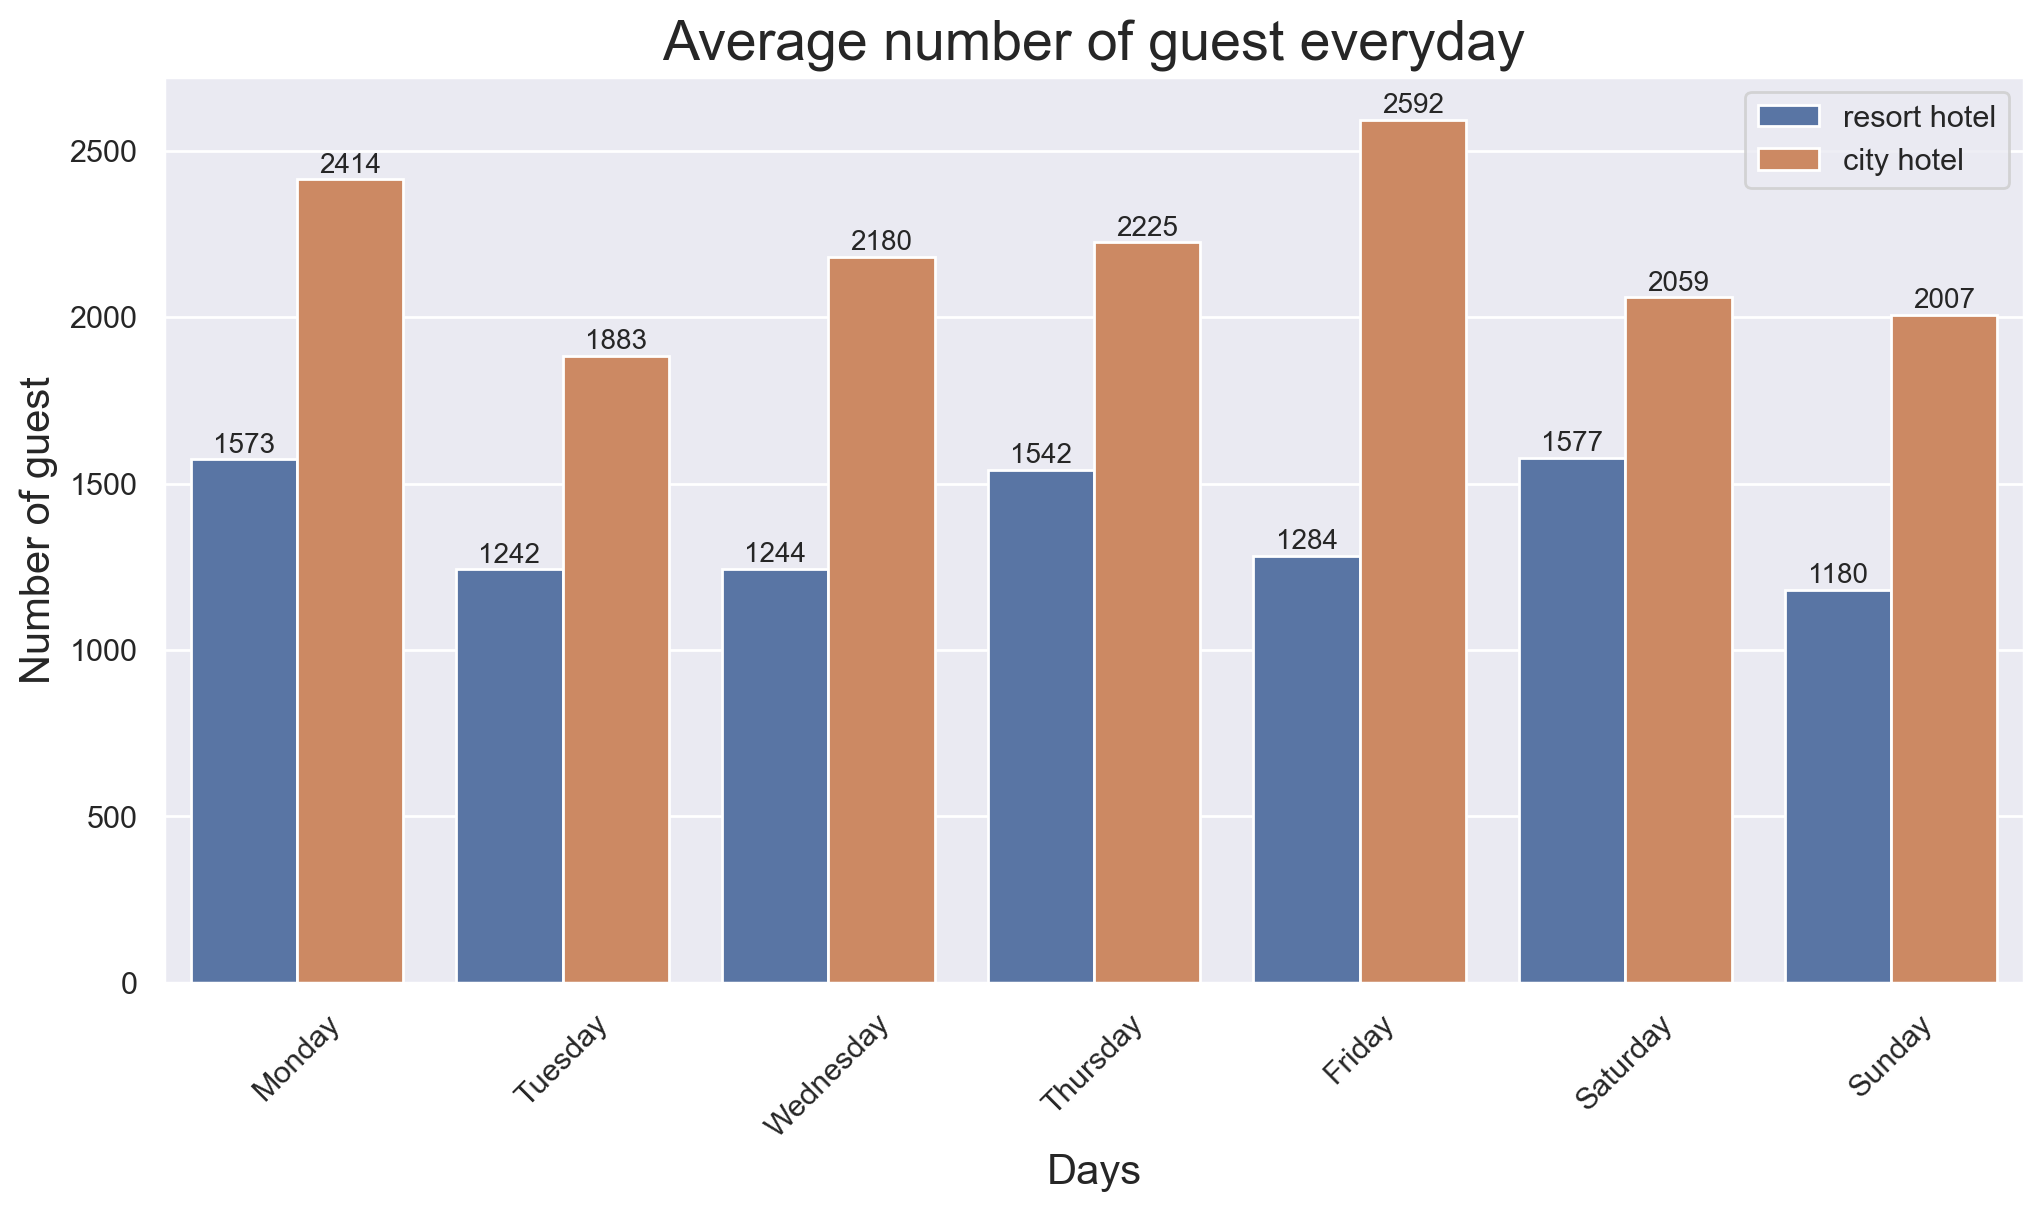

In [27]:
plt.figure(figsize=(12,6),dpi=200)
sns.set(style='darkgrid') #white, dark, whitegrid, darkgrid, ticks
plots = sns.barplot(x=most_booking_days['Day Name'],y=most_booking_days['Booking'],hue=most_booking_days['Hotel'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0,5),
                   textcoords='offset points')
    
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.title('Average number of guest everyday',fontsize=20)
plt.xlabel('Days',fontsize=15)
plt.ylabel('Number of guest',fontsize=15)
plt.show()

In [28]:
print(f"minimum average number of booking in city hotel is {most_booking_daych['Booking'].min()} on {most_booking_daych['Booking'].idxmin()}")
print(f"maximum average number of booking in city hotel is {most_booking_daych['Booking'].max()} on {most_booking_daych['Booking'].idxmax()}")

minimum average number of booking in city hotel is 1883.0 on Tuesday
maximum average number of booking in city hotel is 2592.0 on Friday


In [29]:
print(f"minimum average number of booking in resort hotel is {most_booking_dayrh['Booking'].min()} on {most_booking_dayrh['Booking'].idxmin()}")
print(f"maximum average number of booking in resort hotel is {round(most_booking_dayrh['Booking'].max(),0)} on {most_booking_dayrh['Booking'].idxmax()}")

minimum average number of booking in resort hotel is 1180.0 on Sunday
maximum average number of booking in resort hotel is 1577.0 on Saturday


In [30]:
most_booking_dayrh[most_booking_dayrh['Booking'] > 1300]

Booking         hotel
Thursday  1542.000000  resort hotel
Monday    1573.333333  resort hotel
Saturday  1576.666667  resort hotel

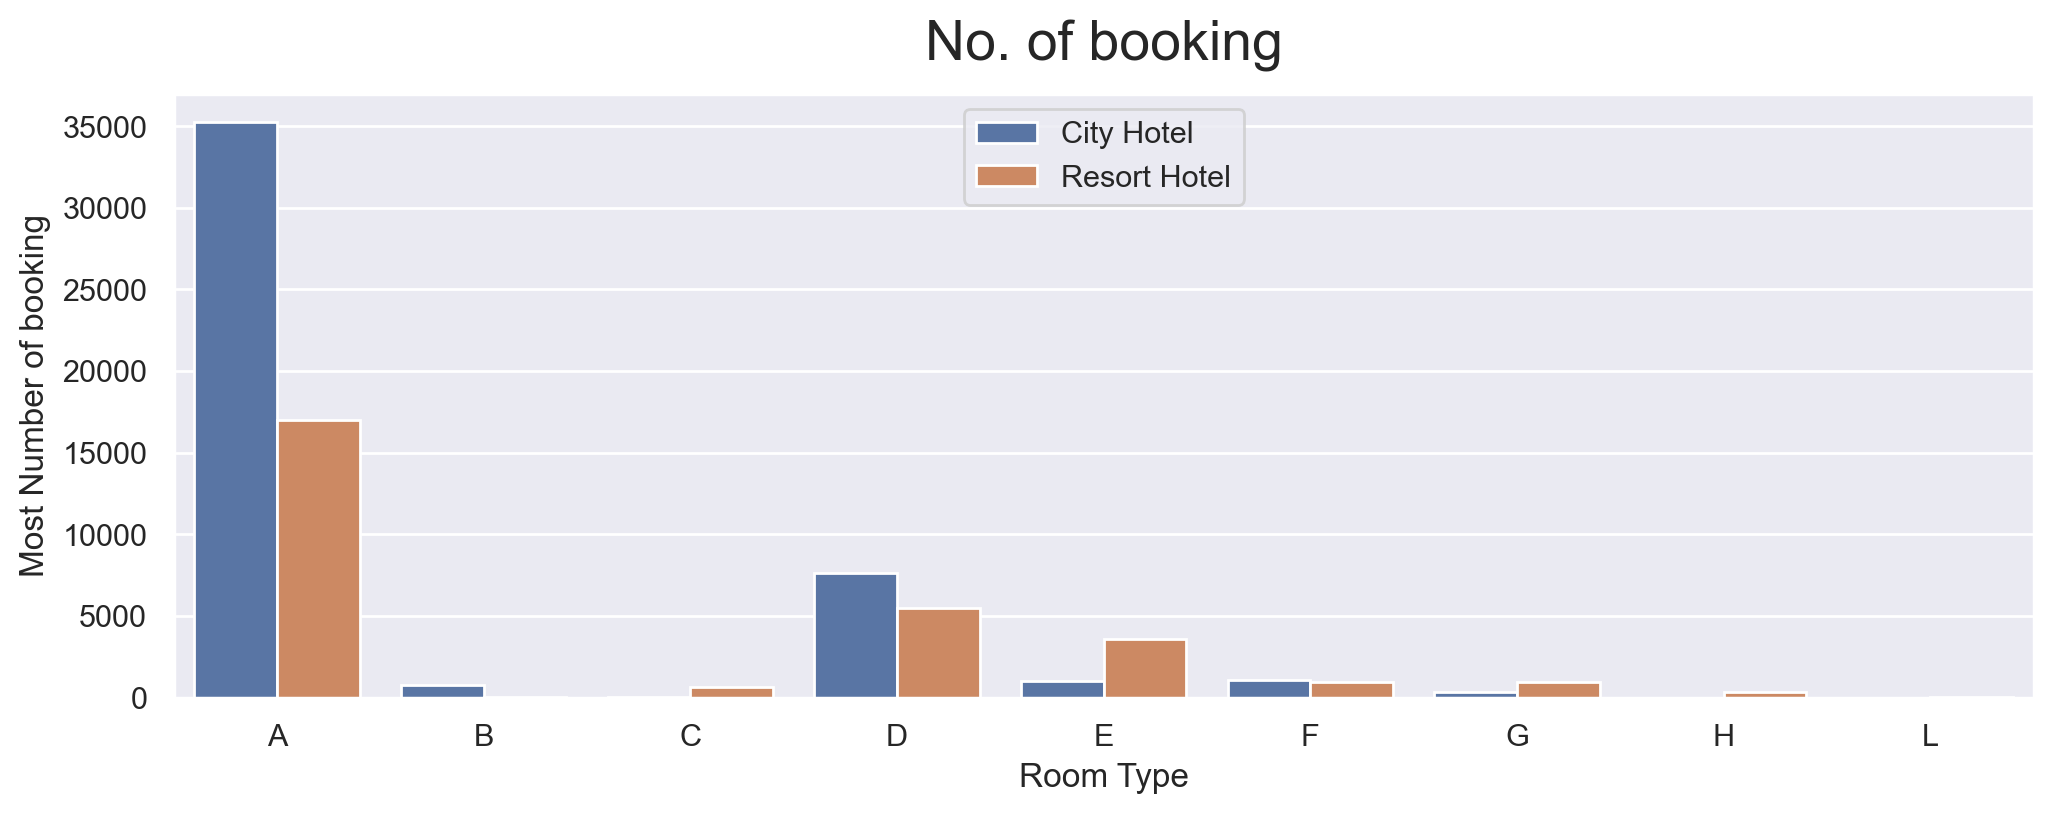

In [31]:
plt.figure(figsize=(12,4),dpi=200)
sns.countplot(data=total_guest.sort_values(by='reserved_room_type'),x='reserved_room_type',hue='hotel')
plt.legend(loc='best')
plt.xlabel('Room Type')
plt.ylabel('Most Number of booking')
plt.title('No. of booking',fontsize=20,pad=12)
plt.show()

In [32]:
room_price = total_guest[['hotel','adr','reserved_room_type']]
room_price = room_price.sort_values(by='reserved_room_type')

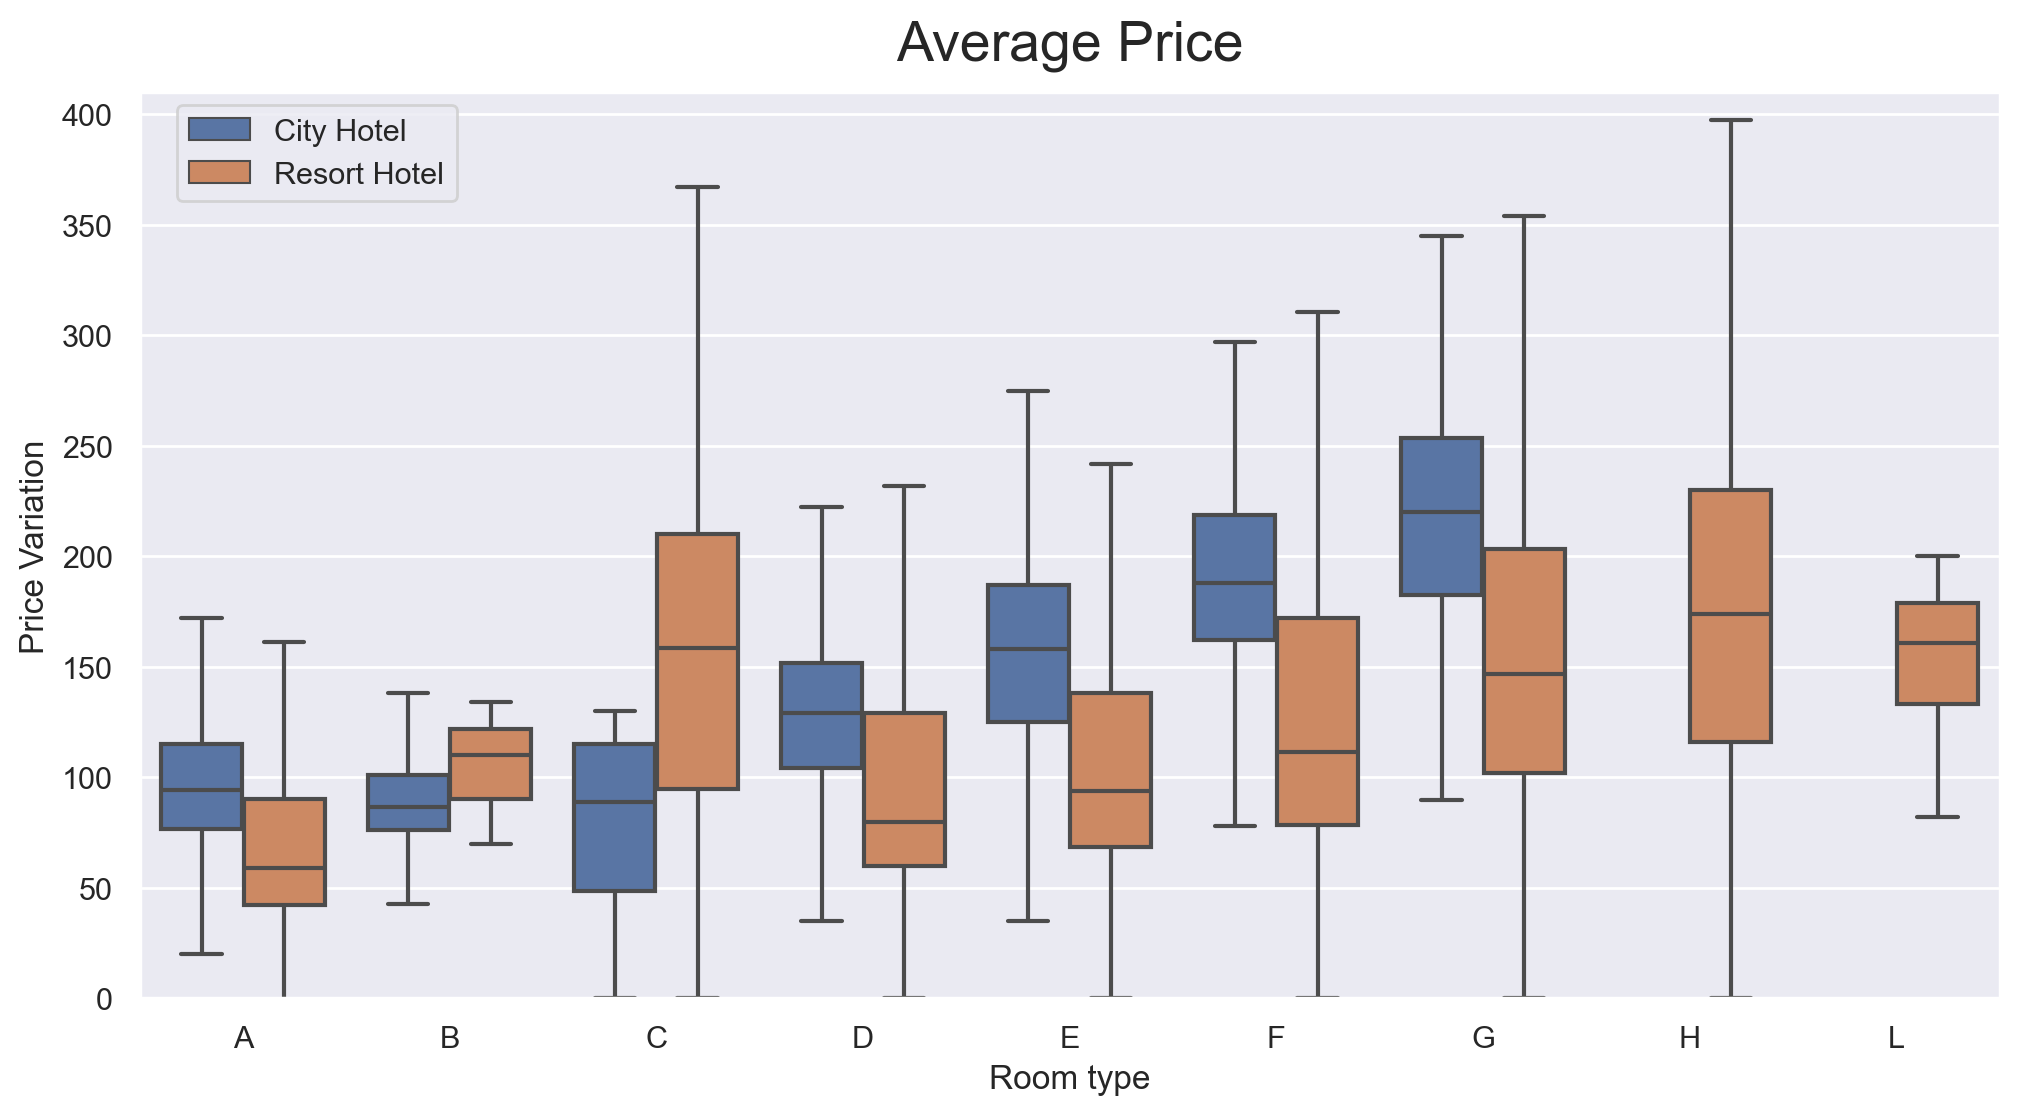

In [33]:
plt.figure(figsize=(12,6),dpi=200)
sns.boxplot(data=room_price,x='reserved_room_type',y='adr',hue='hotel',fliersize=0)
plt.ylim(0,410)
plt.legend(loc=(0.02,0.88))

plt.xlabel('Room type',fontsize=12)
plt.ylabel('Price Variation')
plt.title('Average Price',fontsize=20,pad=12)
plt.show()

In [34]:
# City Hotel top 3 average room price
print("\033[1m" + "City hotel top 3 average room price" + "\033[0m")
room_price[room_price['hotel'] == 'City Hotel'].groupby('reserved_room_type').mean().nlargest(3,'adr')

City hotel top 3 average room price


adr
reserved_room_type            
G                   195.370634
F                   185.629733
E                   154.470511

In [35]:
# Resort Hotel top 3 average room price
print("\033[1m" + "Resort hotel top 3 average room price" + "\033[0m")
room_price[room_price['hotel'] == 'Resort Hotel'].groupby('reserved_room_type').mean().nlargest(3,'adr')

Resort hotel top 3 average room price


adr
reserved_room_type            
H                   180.870112
G                   159.767650
C                   154.263187

In [36]:
# Number of transaction for each channel

# To get particular order
order_values = ['Undefined','GDS','Corporate','Direct','TA/TO'] #
total_guest['distribution_channel'] = pd.Categorical(total_guest['distribution_channel'],
                                                     categories=order_values,ordered=True)

print("\033[1m" + "Number of transaction for each channel" + "\033[0m")
total_guest.groupby(['distribution_channel','hotel'])['adr'].count().to_frame()

Number of transaction for each channel


adr
distribution_channel hotel              
Undefined            City Hotel        0
                     Resort Hotel      1
GDS                  City Hotel      156
                     Resort Hotel      0
Corporate            City Hotel     2607
                     Resort Hotel   2577
Direct               City Hotel     5519
                     Resort Hotel   6537
TA/TO                City Hotel    37802
                     Resort Hotel  19812

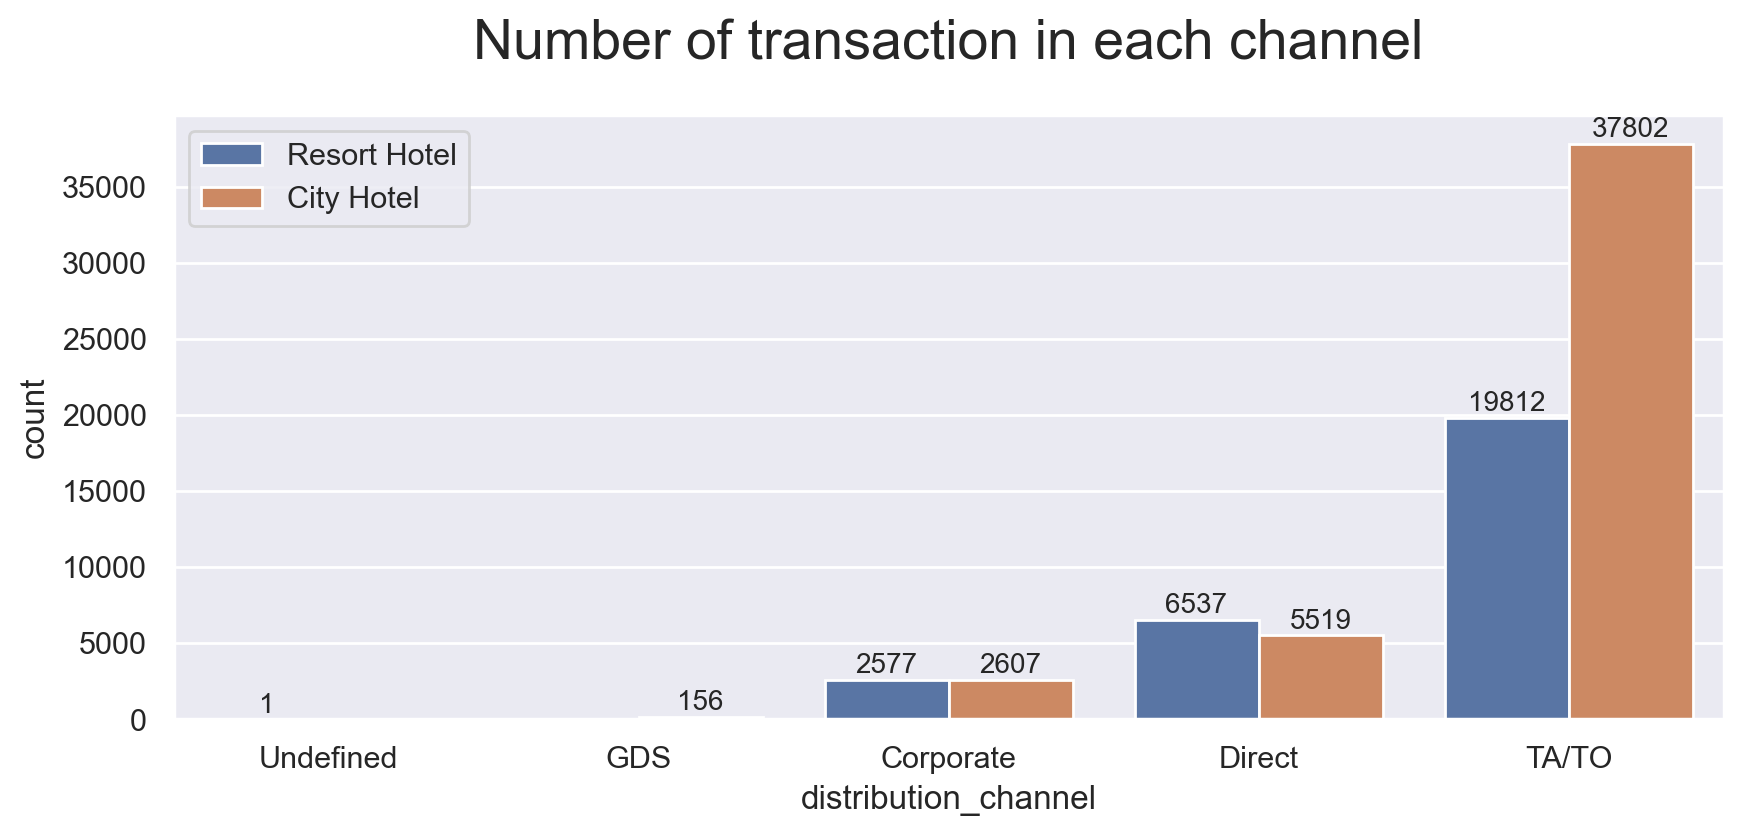

In [37]:
# Graph presentation of Transaction for each channel
plt.figure(figsize=(10,4),dpi=200)
plot = sns.countplot(x=total_guest['distribution_channel'],hue=total_guest['hotel'])

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0,5),
                   textcoords='offset points')
    

plt.title('Number of transaction in each channel',fontsize=20,pad=20)
plt.legend(loc='upper left')
plt.show()

In [38]:
print('Maximum number of transaction goes to TA/TO i.e Travel Agent/Tour Operators.')

Maximum number of transaction goes to TA/TO i.e Travel Agent/Tour Operators.


In [39]:
no_deposit = total_guest[total_guest['deposit_type'] == 'No Deposit'] # Guest with no deposit dataset
refundable = total_guest[total_guest['deposit_type'] == 'Refundable'] # Guest with Refundable dataset
non_refund = total_guest[total_guest['deposit_type'] == 'Non Refund'] # Guest with Non Refund dataset

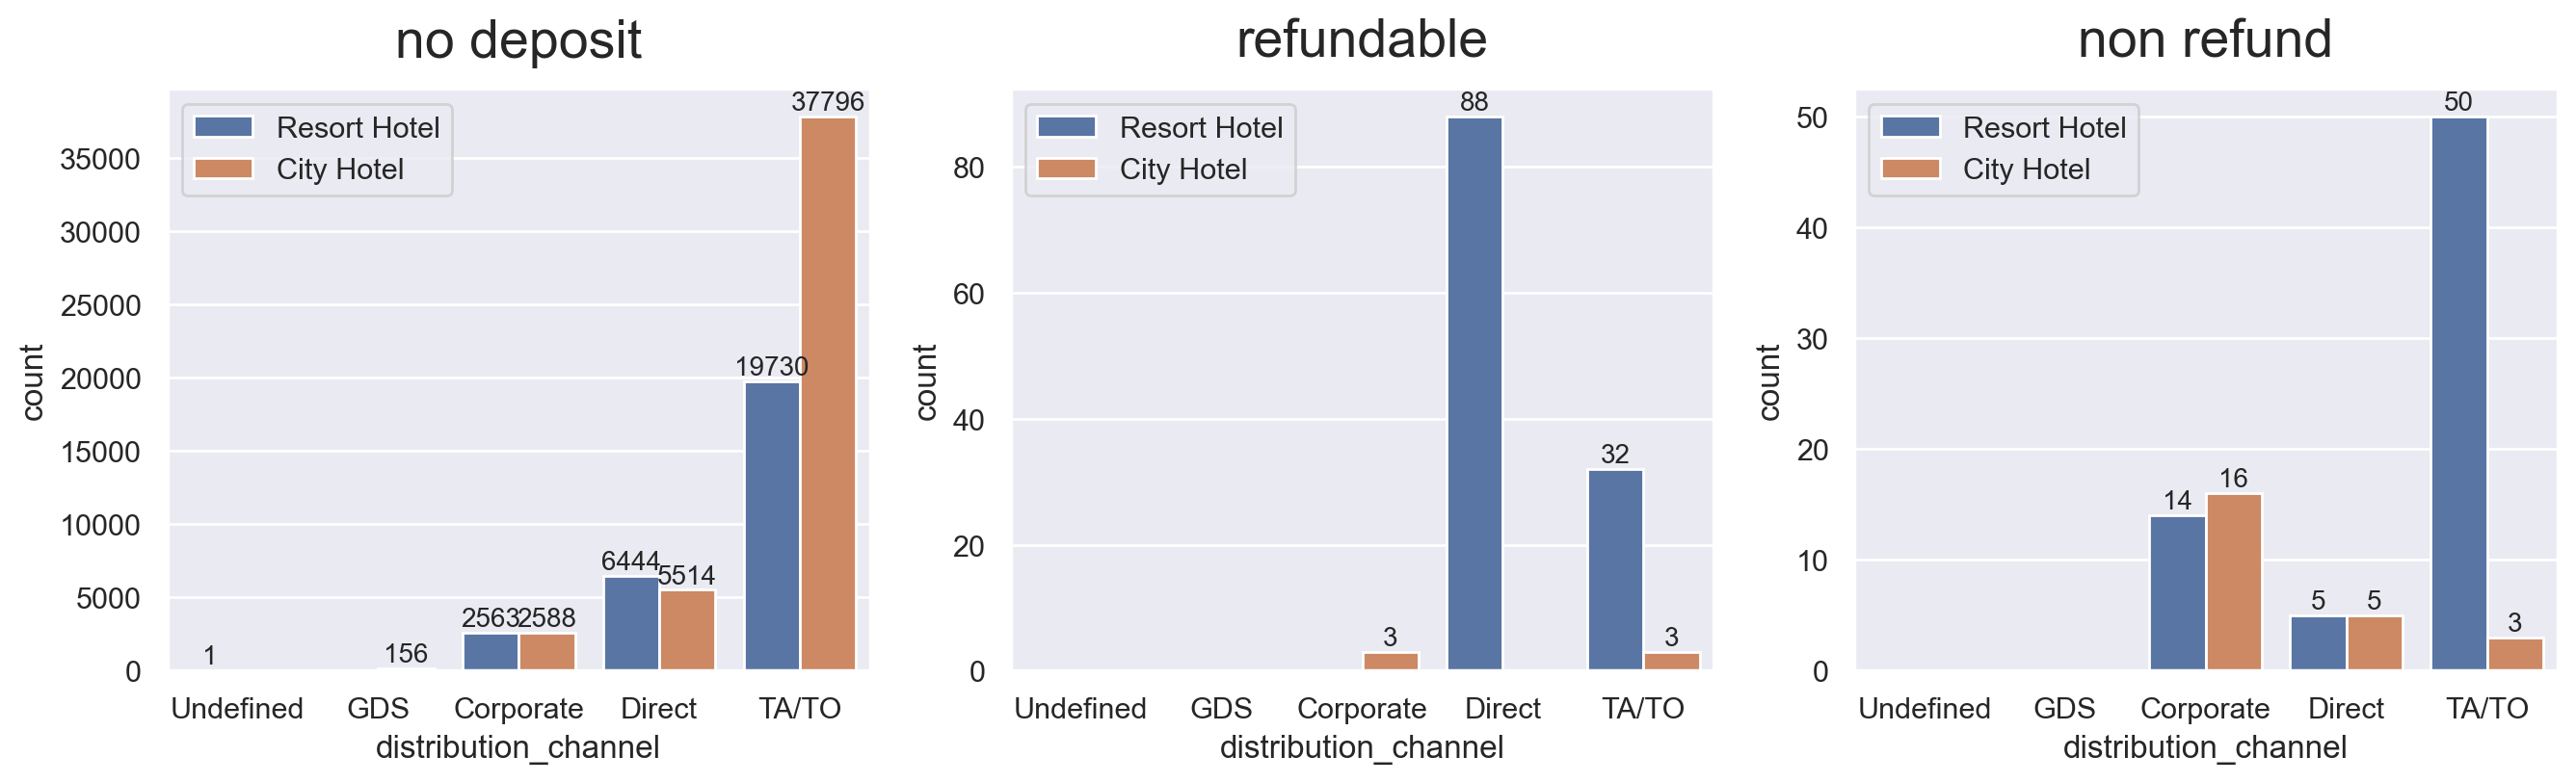

In [40]:
# Different deposit type in our dataset
fig,axes = plt.subplots(ncols=3,figsize=(16,4),dpi=200)
plot1 = sns.countplot(x=no_deposit['distribution_channel'],hue=no_deposit['hotel'],ax=axes[0])
plot2 = sns.countplot(x=refundable['distribution_channel'],hue=refundable['hotel'],ax=axes[1])
plot3 = sns.countplot(x=non_refund['distribution_channel'],hue=non_refund['hotel'],ax=axes[2])

for bar in plot1.patches:
    plot1.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0,5),
                   textcoords='offset points')
    
for bar in plot2.patches:
    plot2.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0,5),
                   textcoords='offset points')
    
for bar in plot3.patches:
    plot3.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0,5),
                   textcoords='offset points')
    
    

axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
axes[2].legend(loc='upper left')
axes[0].set_title('no deposit',pad=12,fontsize=20)
axes[1].set_title('refundable',pad=12,fontsize=20)
axes[2].set_title('non refund',pad=12,fontsize=20)
plt.show()

In [41]:
# HOTEL BOOKING BASED ON MARKET SEGMENT 
total_guest.groupby(['market_segment','hotel'])['adr'].count().to_frame().rename(columns={'adr':'No. of booking'})

No. of booking
market_segment hotel                       
Aviation       City Hotel               183
Complementary  City Hotel               471
               Resort Hotel             168
Corporate      City Hotel              2337
               Resort Hotel            1954
Direct         City Hotel              5016
               Resort Hotel            5632
Groups         City Hotel              4339
               Resort Hotel            3358
Offline TA/TO  City Hotel              9546
               Resort Hotel            6334
Online TA      City Hotel             24192
               Resort Hotel           11481

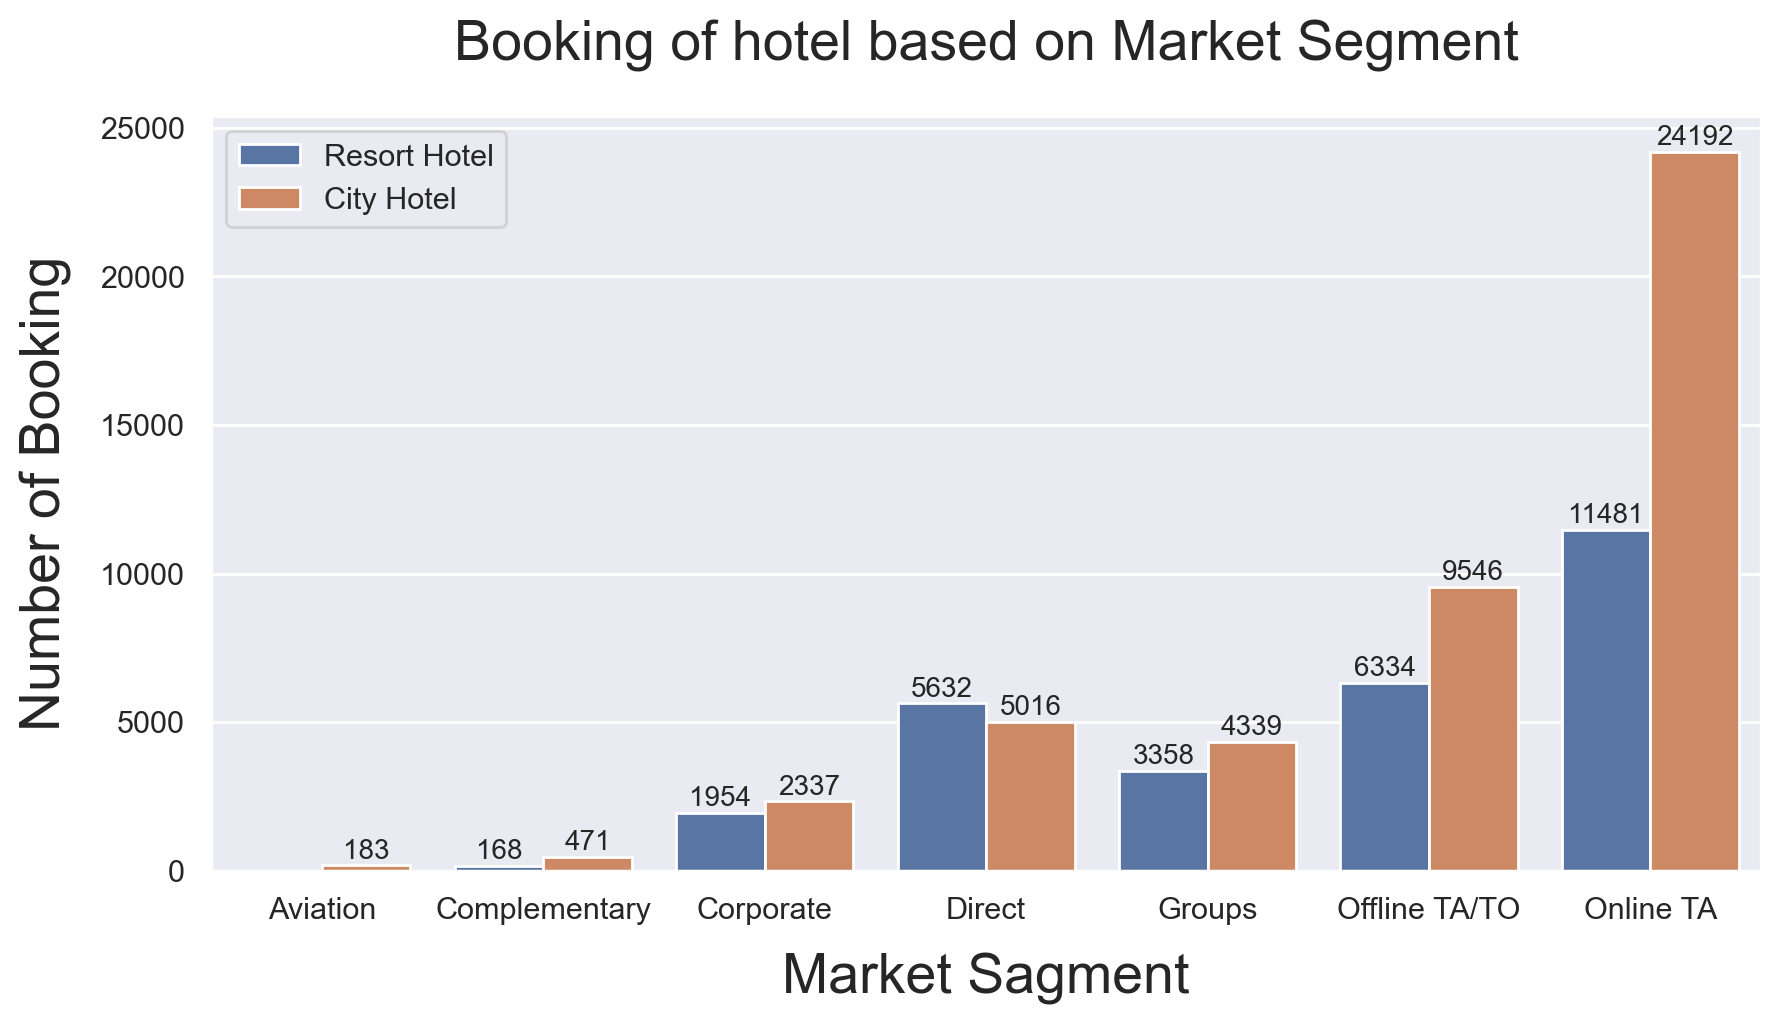

In [42]:
# GRAPH PRESENTATION OF HOTEL BOOKING BASED ON MARKET SEGMENT
order_values = ['Aviation','Complementary','Corporate','Direct','Groups','Offline TA/TO','Online TA']
total_guest['market_segment'] = pd.Categorical(total_guest['market_segment'],categories=order_values,ordered=True)

plt.figure(figsize=(10,5),dpi=200)
plot = sns.countplot(x=total_guest['market_segment'],hue=total_guest['hotel'])

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0,5),
                   textcoords='offset points')
    
plt.xlabel('Market Sagment',labelpad=10,fontsize=20)
plt.ylabel('Number of Booking',labelpad=10,fontsize=20)
plt.title('Booking of hotel based on Market Segment',fontsize=20,pad=20)
plt.legend(loc='upper left')
plt.show()

In [43]:
print('For marketing purposes, Online TA(travel agent) is doing great work in both resort and city hotels after Online TA Offline TA/TO also getting a good response.')

For marketing purposes, Online TA(travel agent) is doing great work in both resort and city hotels after Online TA Offline TA/TO also getting a good response.


In [44]:
# Monthly room price per person
monthly_room_price = total_guest[['hotel','arrival_date_month','adr']]
monthly_room_price.groupby(['hotel','arrival_date_month'])['adr'].mean().to_frame()

adr
hotel        arrival_date_month            
City Hotel   January              82.330983
             February             86.520062
             March                90.658533
             April               111.962267
             May                 120.669827
             June                117.874360
             July                115.818019
             August              118.674598
             September           112.776582
             October             102.004672
             November             86.946592
             December             88.401855
Resort Hotel January              48.761125
             February             54.147478
             March                57.056838
             April                75.867816
             May                  76.657558
             June                107.974850
             July                150.122528
             August              181.205892
             September            96.416860
             October              61.775449
             November             48.706289
             December             68.410104

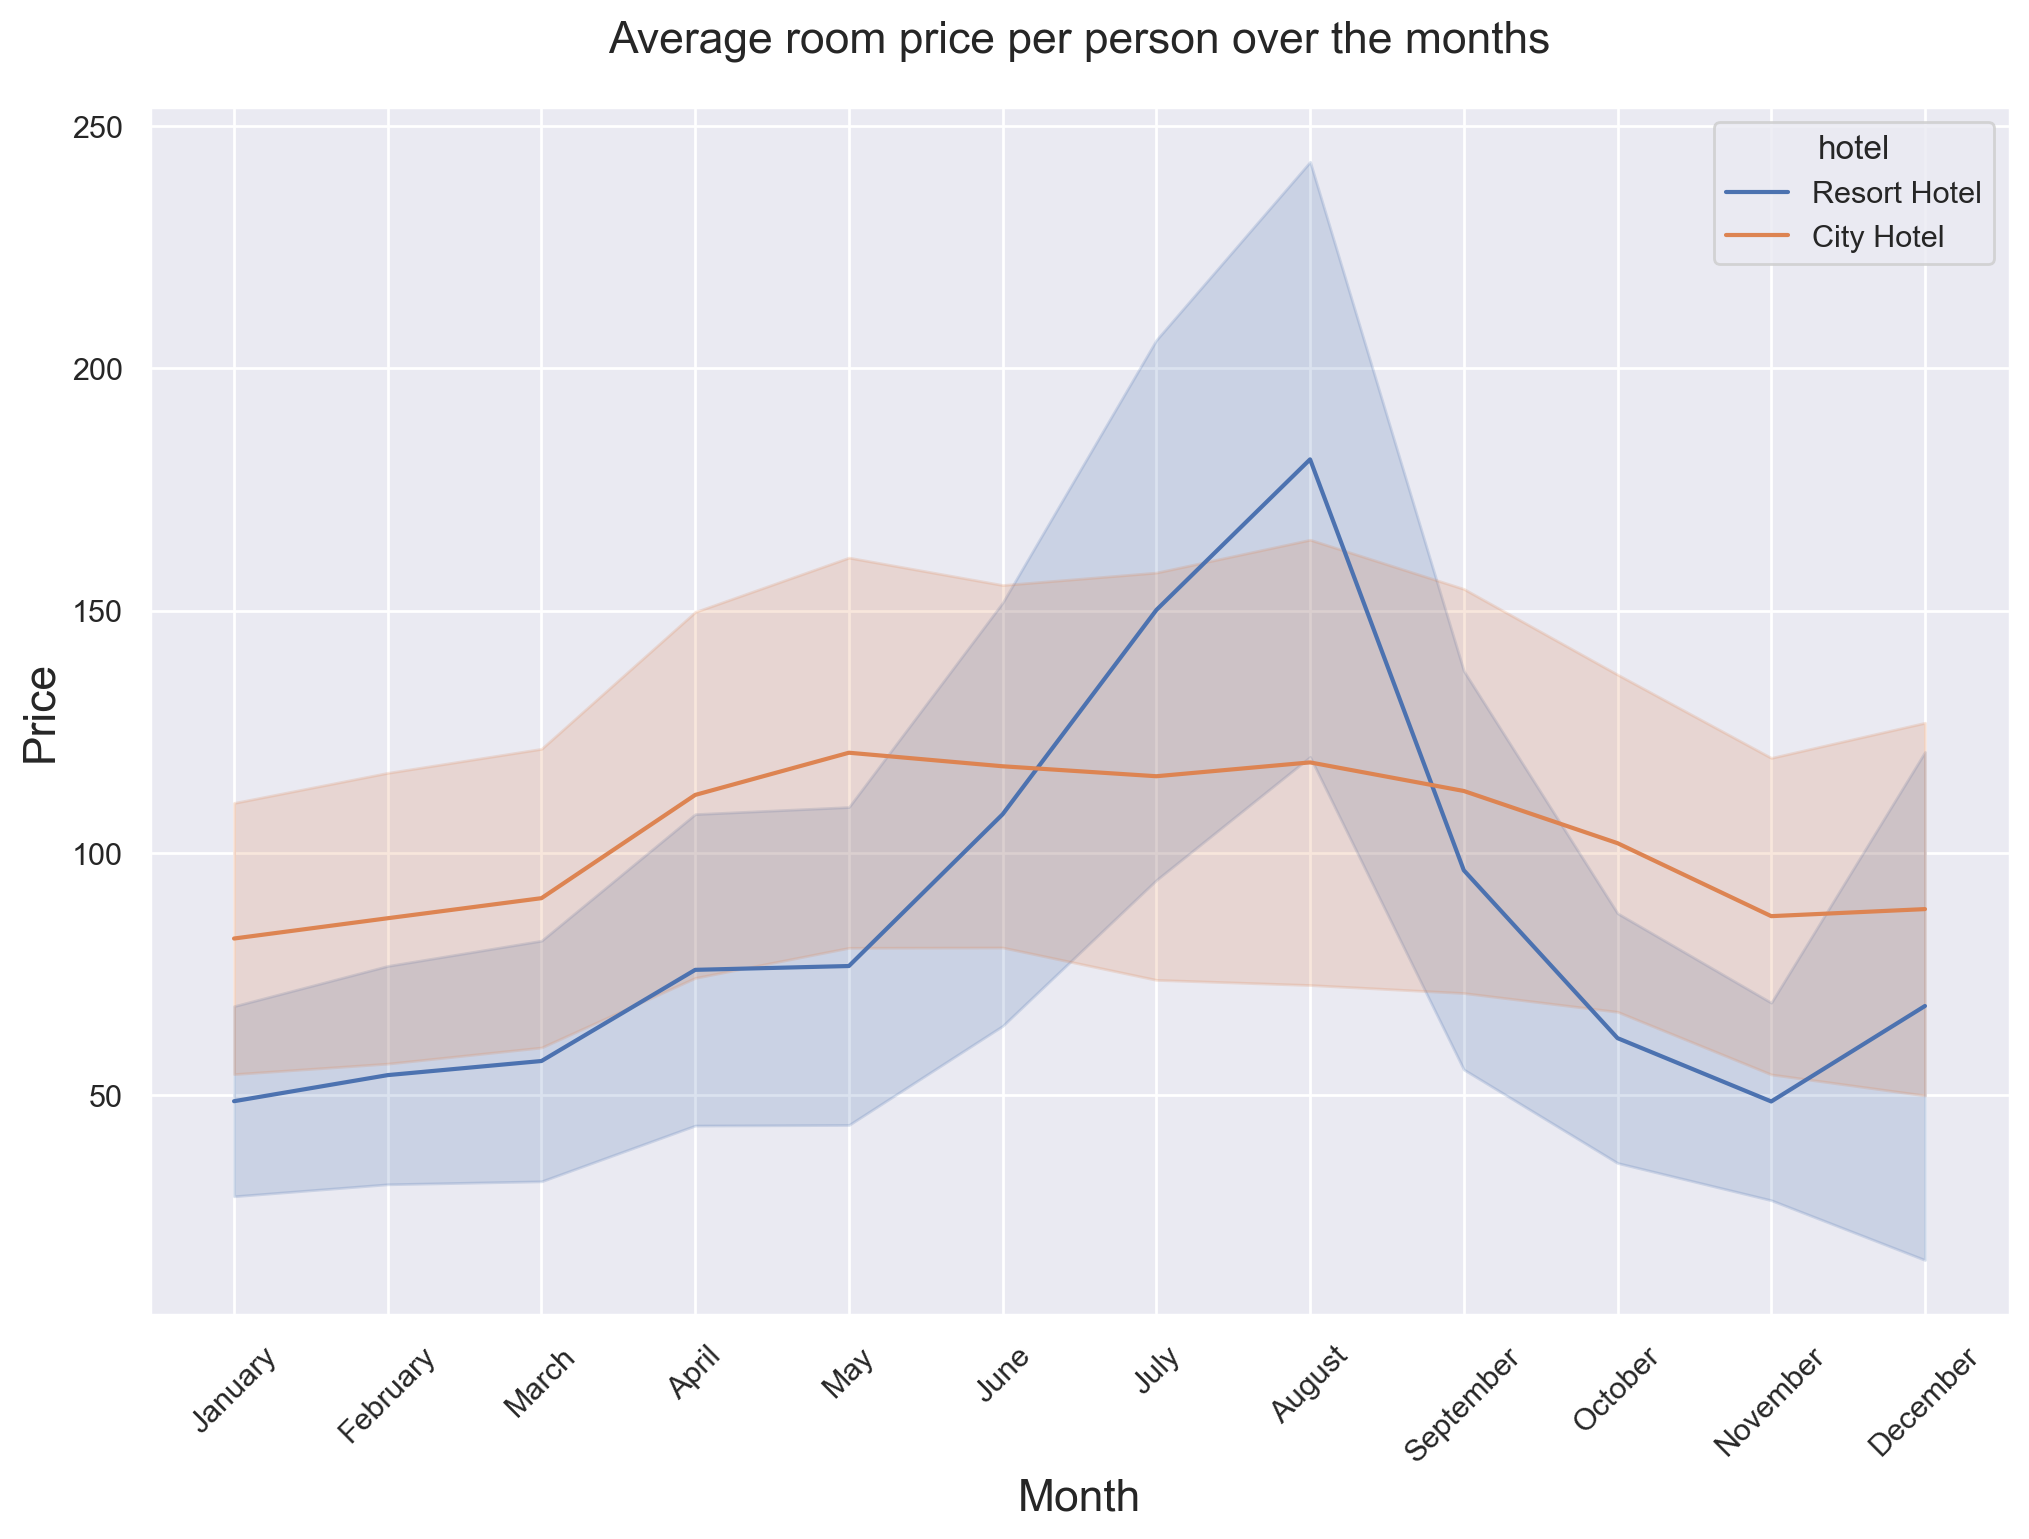

In a resort hotel fluctuation is way high than in a city hotel


In [45]:
# Graph presentation of room price per person
plt.figure(figsize=(12,8),dpi=200)
sns.lineplot(x=monthly_room_price['arrival_date_month'],y=monthly_room_price['adr'],hue=monthly_room_price['hotel'],ci='sd')
plt.xticks(rotation=45)

plt.xlabel("Month", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("Average room price per person over the months", fontsize=16,pad=20)
plt.show()
print("\033[1m" + "In a resort hotel fluctuation is way high than in a city hotel" + "\033[0m")

# Booking Cancellation 

In [46]:
total_rh_data = df[df['hotel'] == 'Resort Hotel'] # TOTAL RESORT HOTEL DATASET (CANCELLATION/NON-CANCELLATION)
total_ch_data = df[df['hotel'] == 'City Hotel'] # TOTAL CITY HOTEL DATASET (CANCELLATION/NON-CANCELLATION)

In [47]:
# Total number of booking per month in both hotels.
resort_hotel_booking = df.loc[df['hotel'] == 'Resort Hotel'].groupby('arrival_date_month')['hotel'].count().to_frame()
city_hotel_booking = df.loc[df['hotel'] == 'City Hotel'].groupby('arrival_date_month')['hotel'].count().to_frame()

# Renaming the column
resort_hotel_booking.columns = ['total booking']
city_hotel_booking.columns = ['total booking']

In [48]:
# Number of cancellation in per months in both hotels
resort_hotel_cancel = total_rh_data.loc[total_rh_data['is_canceled'] == 1].groupby('arrival_date_month')['hotel'].count()
city_hotel_cancel = total_ch_data.loc[total_ch_data['is_canceled'] == 1].groupby('arrival_date_month')['hotel'].count()

In [49]:
# Creating new column and appending no. of cancellation per month in both resort and city hotel dataset
resort_hotel_booking['no of cancellation'] = resort_hotel_cancel.values
city_hotel_booking['no of cancellation'] = city_hotel_cancel.values

In [50]:
# Creating new column to get percentage of cancellation in both hotel dataset
resort_hotel_booking['Percentage of cancellation'] = round(resort_hotel_booking['no of cancellation']*100/resort_hotel_booking['total booking'],2) 
city_hotel_booking['Percentage of cancellation'] = round(city_hotel_booking['no of cancellation']*100/city_hotel_booking['total booking'],2) 

In [51]:
# Creating hotel name in both dataset which help for concatenation of the dataset
resort_hotel_booking['hotel'] = ['resort hotel']*len(resort_hotel_booking)
city_hotel_booking['hotel'] = ['city hotel']*len(city_hotel_booking)

# Joining dataset
month_cancellation_data = pd.concat([resort_hotel_booking,city_hotel_booking])
month_cancellation_data.reset_index(inplace=True)

In [52]:
month_cancellation_data

arrival_date_month  total booking  no of cancellation  \
0               April           3609                1059   
1              August           4894                1637   
2            December           2648                 631   
3            February           3103                 795   
4             January           2193                 325   
5                July           4573                1436   
6                June           3045                1007   
7               March           3336                 763   
8                 May           3559                1024   
9            November           2437                 461   
10            October           3555                 978   
11          September           3108                1006   
12              April           7480                3465   
13             August           8983                3602   
14           December           4132                1740   
15           February           4965                1901   
16            January           3736                1482   
17               July           8088                3306   
18               June           7894                3528   
19              March           6458                2386   
20                May           8232                3653   
21           November           4357                1661   
22            October           7605                3268   
23          September           7400                3110   

    Percentage of cancellation         hotel  
0                        29.34  resort hotel  
1                        33.45  resort hotel  
2                        23.83  resort hotel  
3                        25.62  resort hotel  
4                        14.82  resort hotel  
5                        31.40  resort hotel  
6                        33.07  resort hotel  
7                        22.87  resort hotel  
8                        28.77  resort hotel  
9                        18.92  resort hotel  
10                       27.51  resort hotel  
11                       32.37  resort hotel  
12                       46.32    city hotel  
13                       40.10    city hotel  
14                       42.11    city hotel  
15                       38.29    city hotel  
16                       39.67    city hotel  
17                       40.88    city hotel  
18                       44.69    city hotel  
19                       36.95    city hotel  
20                       44.38    city hotel  
21                       38.12    city hotel  
22                       42.97    city hotel  
23                       42.03    city hotel

In [53]:
# To get particular order
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

month_cancellation_data['arrival_date_month'] = pd.Categorical(month_cancellation_data['arrival_date_month'],
                                                               categories=ordered_months,ordered=True)

In [54]:
total_cancel = df['is_canceled'].sum() 
resort_cancel = df[df['hotel'] == 'Resort Hotel']['is_canceled'].sum()
city_cancel = df[df['hotel'] == 'City Hotel']['is_canceled'].sum()

print(f"Total booking cancel : {total_cancel} out of {len(df)} which is ({round(total_cancel*100/len(df),2)}%)")
print(f"Resort booking cancel : {resort_cancel} out of {len(df[df['hotel']=='Resort Hotel'])} which is ({round(resort_cancel*100/len(df[df['hotel']=='Resort Hotel']),2)}%)")
print(f"City booking cancel : {city_cancel} out of {len(df[df['hotel']=='City Hotel'])} which is ({round(city_cancel*100/len(df[df['hotel']=='City Hotel']),2)}%)")

Total booking cancel : 44224 out of 119390 which is (37.04%)
Resort booking cancel : 11122 out of 40060 which is (27.76%)
City booking cancel : 33102 out of 79330 which is (41.73%)


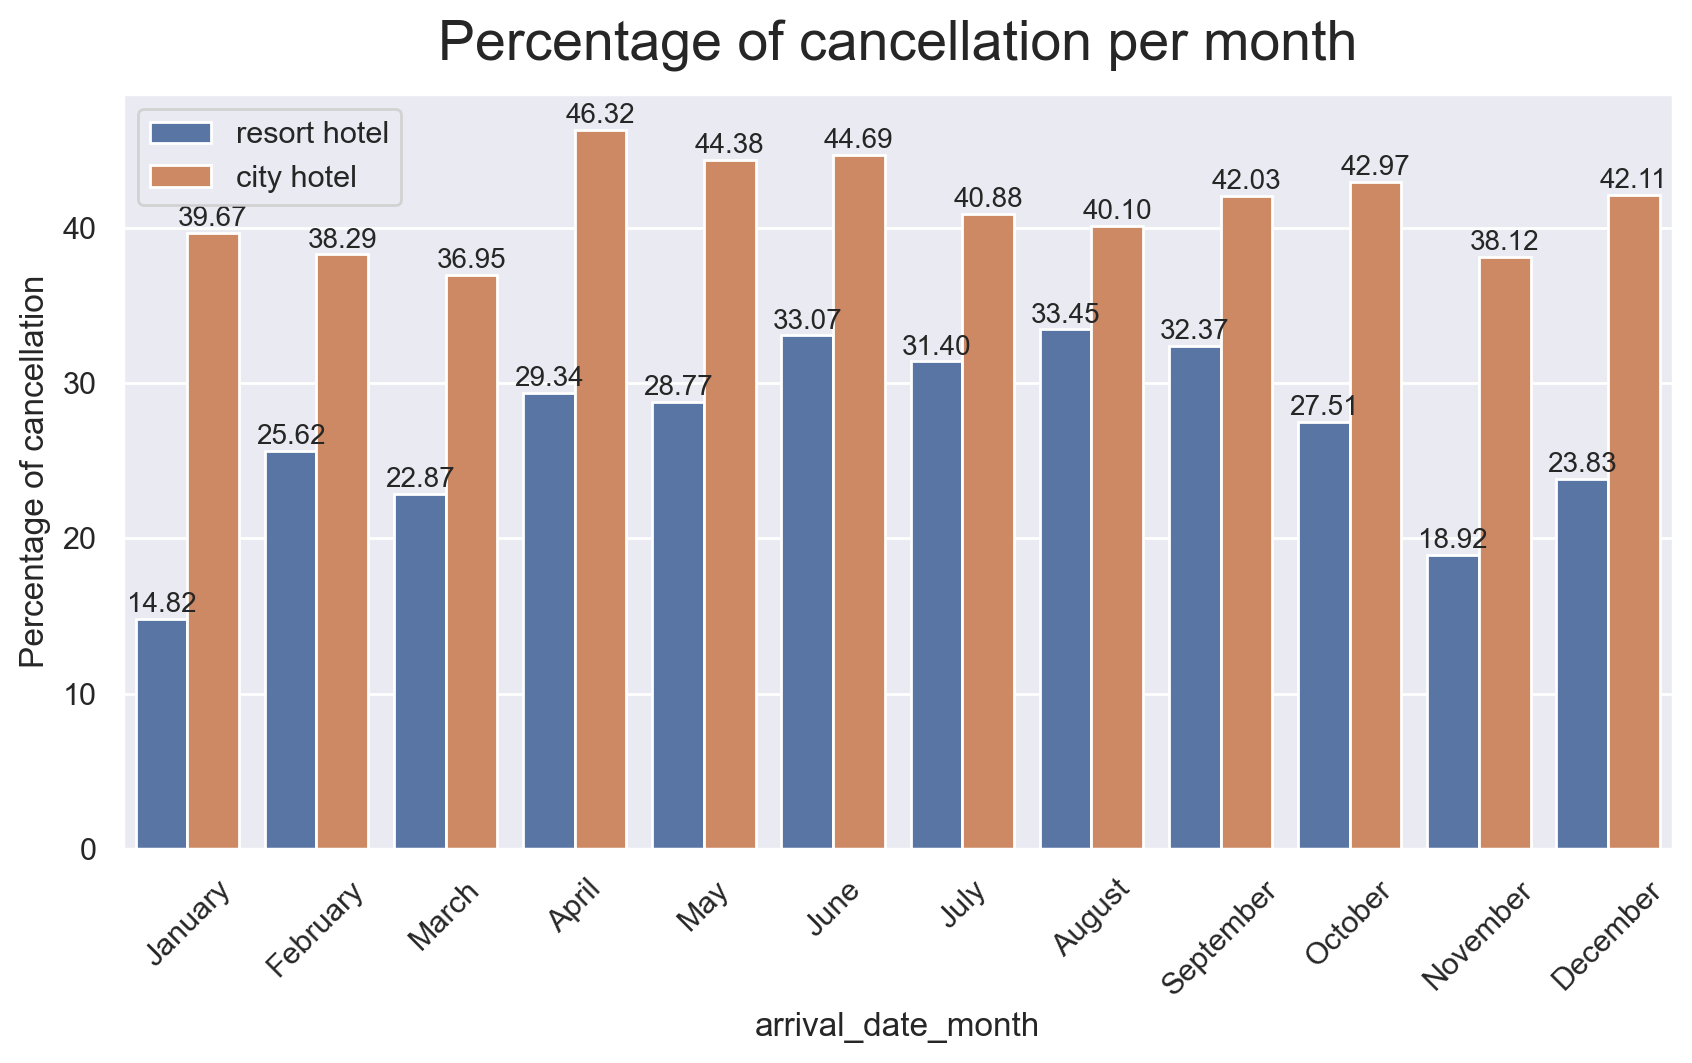

In [55]:
# Graph view of cancellation
plt.figure(figsize=(10,5),dpi=200)
plot = sns.barplot(x=month_cancellation_data['arrival_date_month'],
            y=month_cancellation_data['Percentage of cancellation'],
            hue=month_cancellation_data['hotel'])

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0,5),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.legend(loc='best')
plt.title("Percentage of cancellation per month",fontsize=20,pad=12)
plt.show()

In [56]:
ch_cancel = month_cancellation_data[month_cancellation_data['hotel'] == 'city hotel'] # City hotel cancellation
rh_cancel = month_cancellation_data[month_cancellation_data['hotel'] == 'resort hotel'] # Resort hotel cancellation

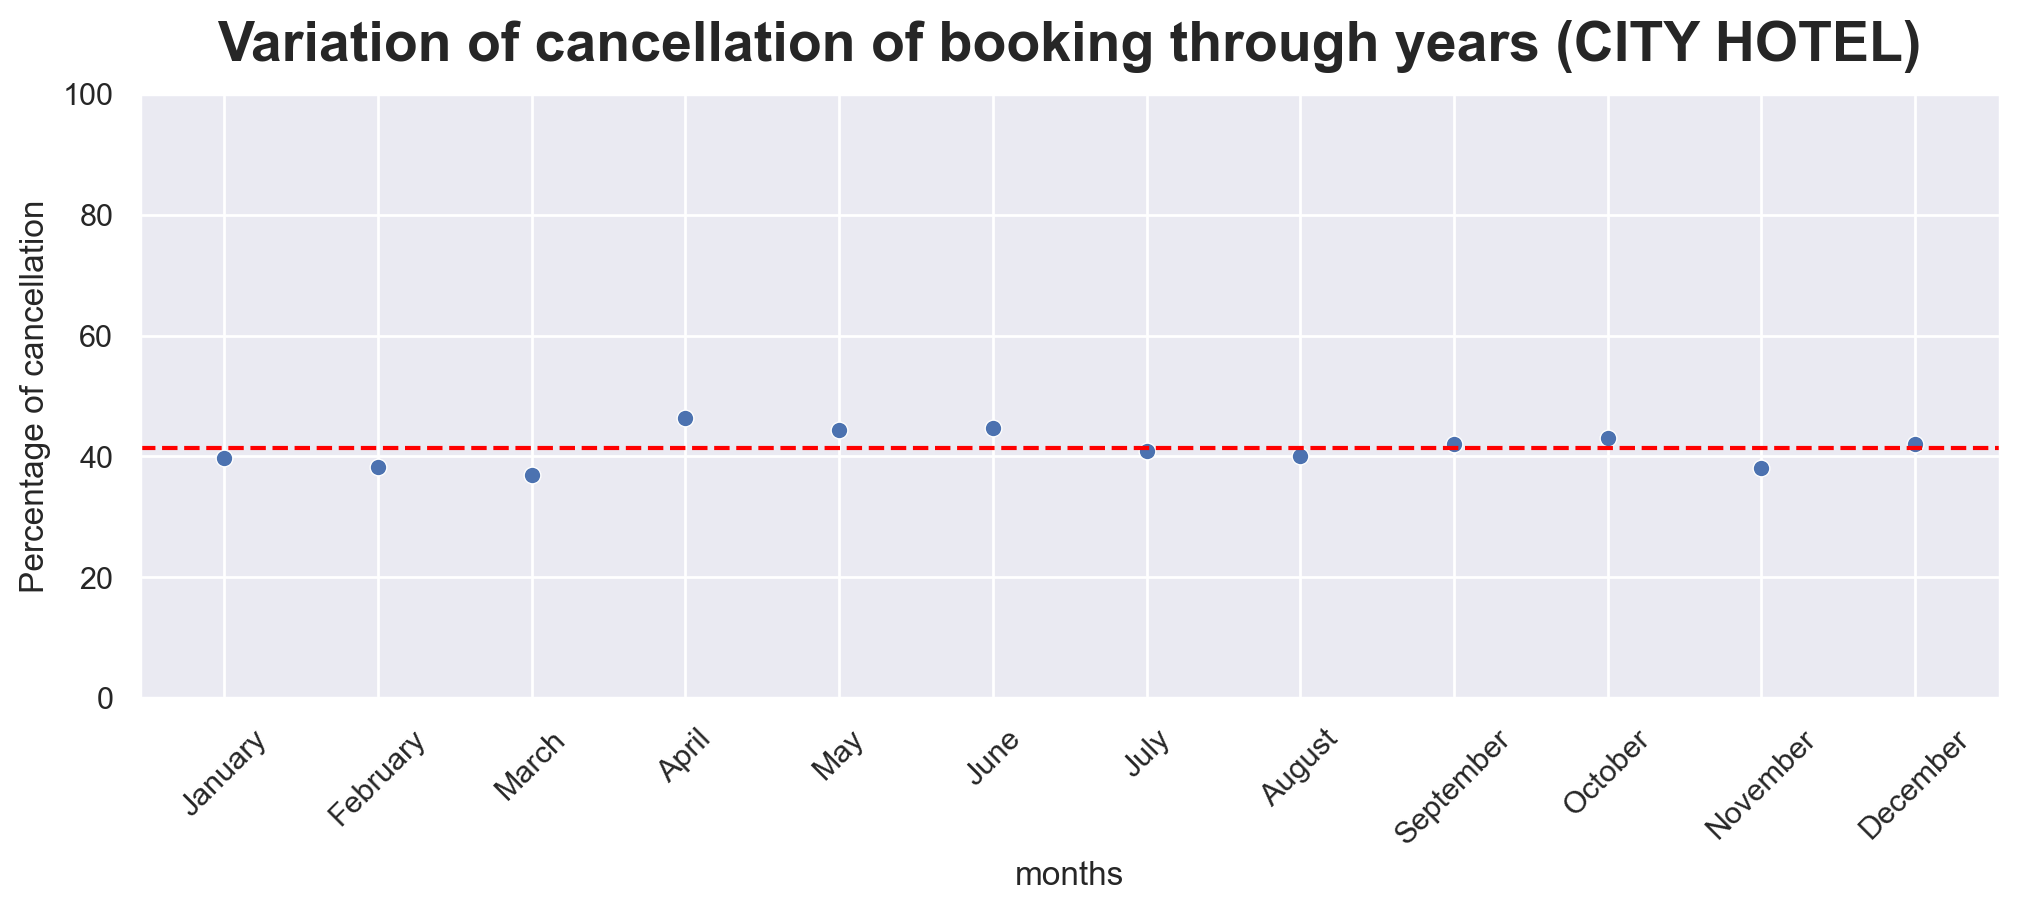

For the City hotel the relative number of cancelations is around 40 % throughout the year.


In [57]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(x=ch_cancel['arrival_date_month'],y=ch_cancel['Percentage of cancellation'])
plt.ylim(0,100)
plt.axhline(y=ch_cancel['Percentage of cancellation'].mean(),color='red',ls='--')
plt.xticks(rotation=45)
plt.title('Variation of cancellation of booking through years (CITY HOTEL)',pad=12,fontsize=20,fontweight='bold')
plt.xlabel('months')
plt.show()
print("\033[1m" + "For the City hotel the relative number of cancelations is around 40 % throughout the year." + "\033[0m")

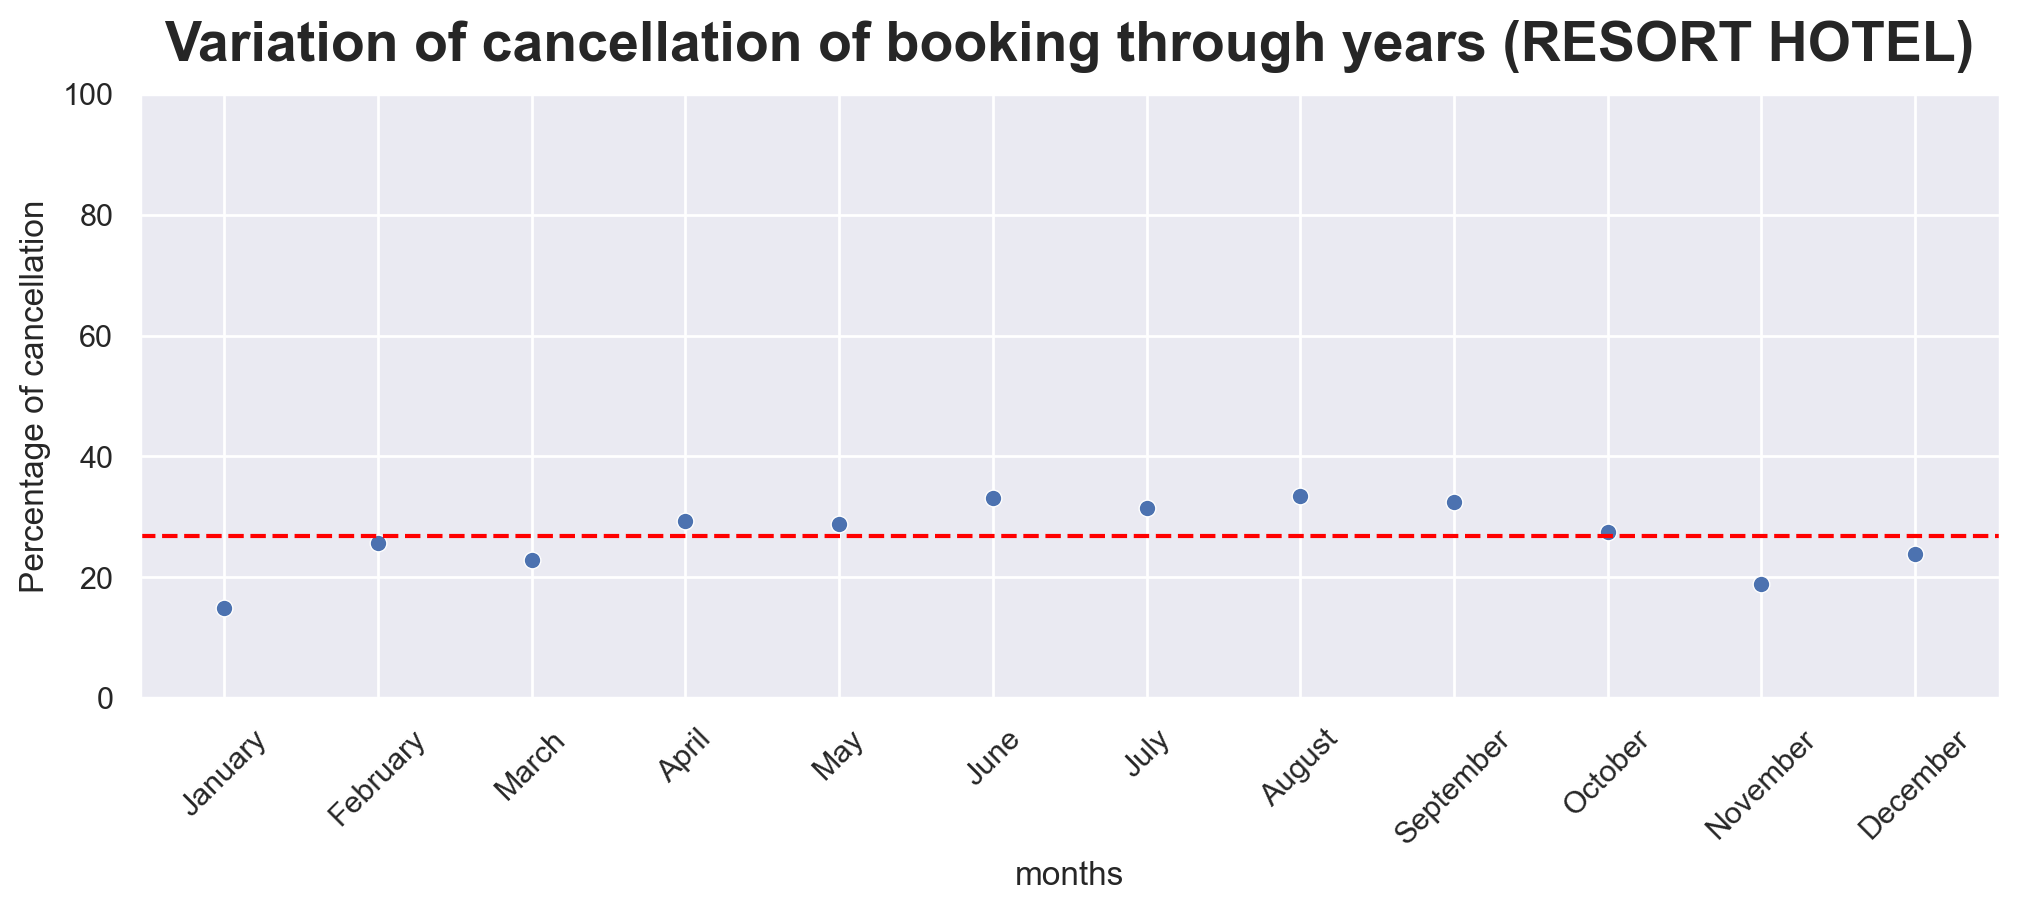

For the Resort hotel it is highest in the summer and lowest during the winter.


In [58]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(x=rh_cancel['arrival_date_month'],y=rh_cancel['Percentage of cancellation'])
plt.ylim(0,100)
plt.axhline(y=rh_cancel['Percentage of cancellation'].mean(),color='red',ls='--')
plt.xticks(rotation=45)
plt.title('Variation of cancellation of booking through years (RESORT HOTEL)',pad=12,fontsize=20,fontweight='bold')
plt.xlabel('months')
plt.show()
print("\033[1m" + "For the Resort hotel it is highest in the summer and lowest during the winter." + "\033[0m")

In [59]:
# To check which feature is most responsible for cancellation.
cancellation_corr = df.corr()['is_canceled'][1:].to_frame() # creating dataset

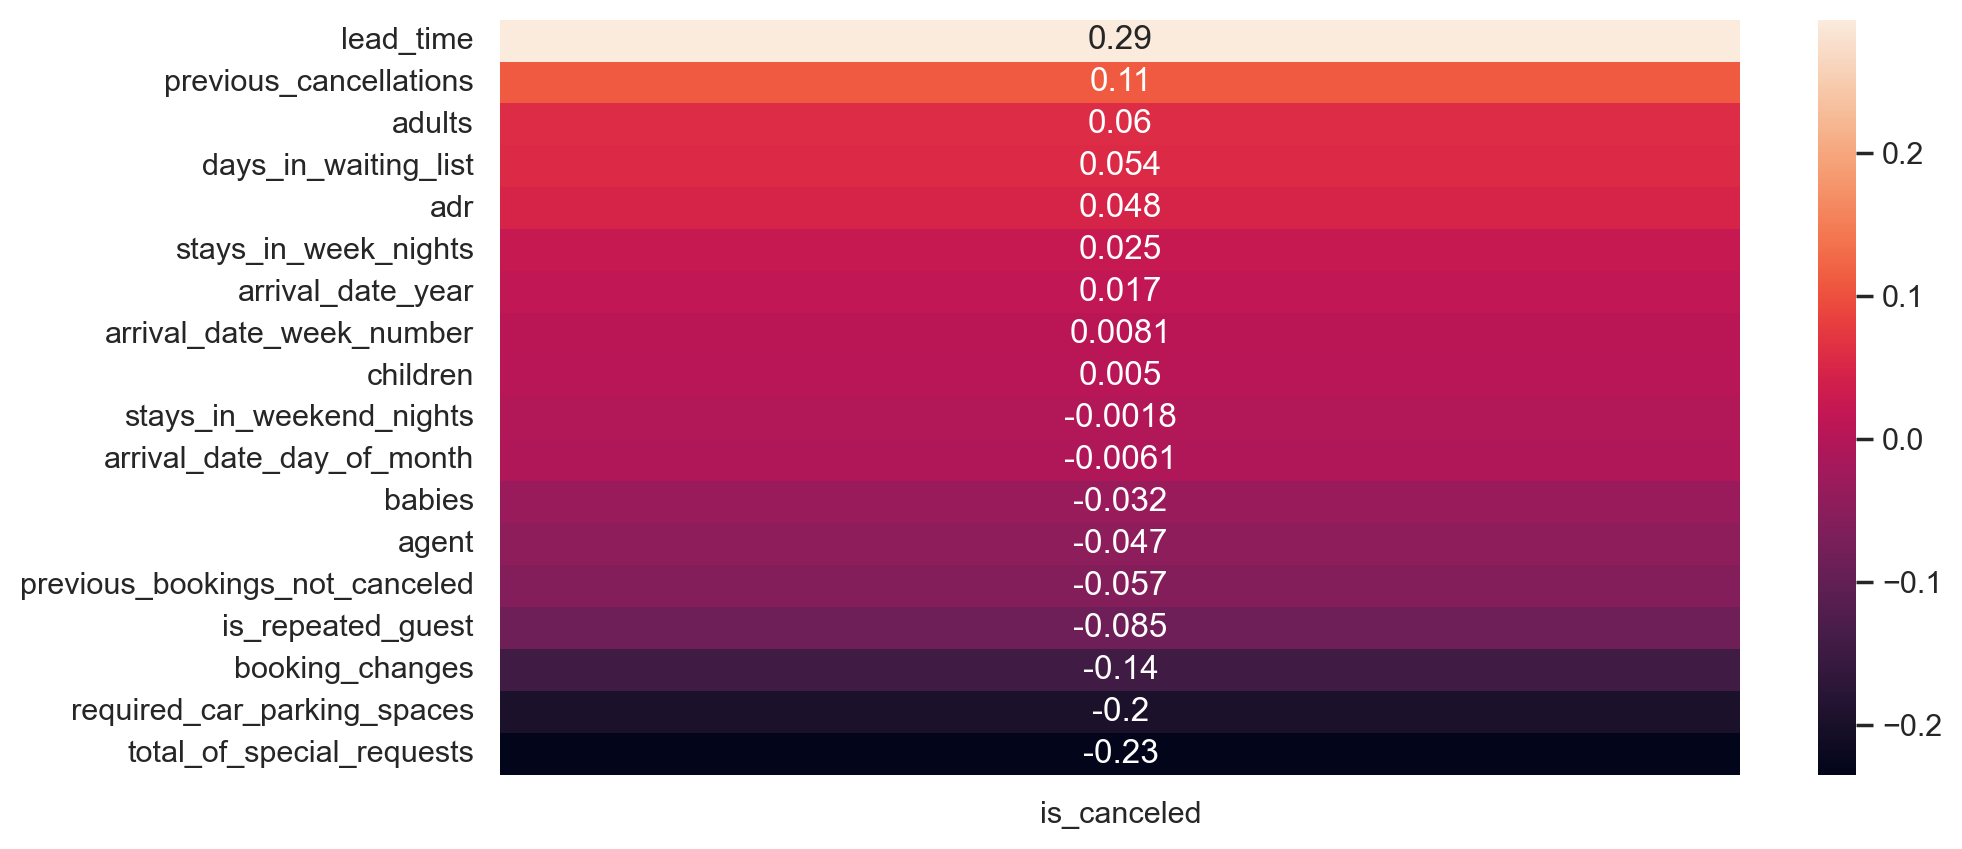

Top 3 feature which effect cancellation i.e lead_time,previous_cancellation and total_of_special_requests


In [60]:
plt.figure(figsize=(10,5),dpi=200)
sns.heatmap(cancellation_corr.sort_values(by='is_canceled',ascending=False),annot=True)
plt.show()

print("\033[1m" + "Top 3 feature which effect cancellation i.e lead_time,previous_cancellation and total_of_special_requests" + "\033[0m")